In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 3)

In [4]:
df0 = pd.read_csv('Leads.csv')
df0.shape

(9240, 37)

In [5]:
df0.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [6]:
for column in df0.select_dtypes('object').columns:
    print(f'{column}: {df0[column].unique()}')
    print()

Prospect ID: ['7927b2df-8bba-4d29-b9a2-b6e0beafe620'
 '2a272436-5132-4136-86fa-dcc88c88f482'
 '8cc8c611-a219-4f35-ad23-fdfd2656bd8a' ...
 'aac550fe-a586-452d-8d3c-f1b62c94e02c'
 '5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9'
 '571b5c8e-a5b2-4d57-8574-f2ffb06fdeff']

Lead Origin: ['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form']

Lead Source: ['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' nan 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']

Do Not Email: ['No' 'Yes']

Do Not Call: ['No' 'Yes']

Last Activity: ['Page Visited on Website' 'Email Opened' 'Unreachable'
 'Converted to Lead' 'Olark Chat Conversation' 'Email Bounced'
 'Email Link Clicked' 'Form Submitted on Website' 'Unsubscribed'
 'Had a Phone Conversation' 'View in browser link Clicked' nan
 'Approached upfront' 'SM

In [7]:
df1 = df0.replace('Select', np.nan) # 'Select' equivalent to not answering

In [8]:
nullPerc = df1.isnull().sum()/df1.shape[0] 
nullFeatures = nullPerc[nullPerc > 0]

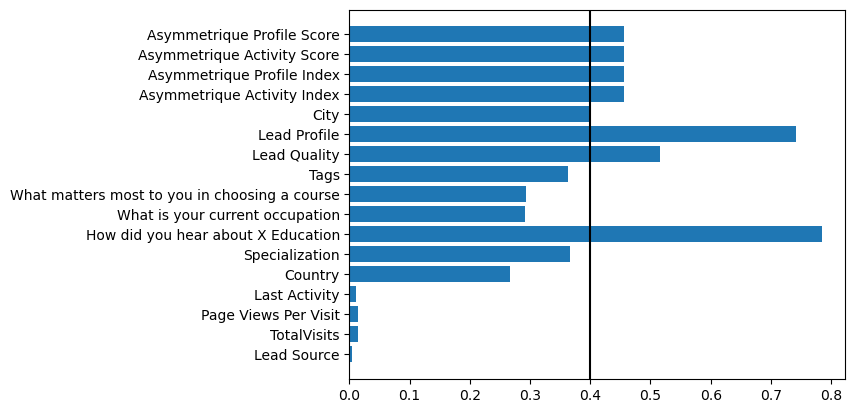

In [9]:
plt.barh(range(len(nullFeatures)), nullFeatures)
plt.axvline(0.4, color='k')
plt.yticks(ticks=range(len(nullFeatures)), labels=nullFeatures.index)
plt.show()

In [10]:
# Dropping features with null values greater than 40%
# Asymmetrique[cols]+ seems to be featured engineered variables(derivative of performance activity) ~ correlated
# Lead Quality will presumabily create highly skewed data if imputed by constant or mode
highNullf = (nullFeatures[nullFeatures > 0.4] == True).index.tolist()

# Tags: not substantially informative
highNullf.append('Tags')
highNullf

df1 = df1.drop(columns=highNullf)

In [11]:
df1 = df1.iloc[:, 2:]

In [12]:
# Low variance columns

redundantCols = list()
for column, n_unique in df1.nunique().items():
    variance = float(n_unique)/df1.shape[0] * 100
    
    if variance < 0.02:
        redundantCols.append(column)
        print(f'{column}, {variance:.2}')

Magazine, 0.011
Receive More Updates About Our Courses, 0.011
Update me on Supply Chain Content, 0.011
Get updates on DM Content, 0.011
I agree to pay the amount through cheque, 0.011


In [13]:
df1.drop(columns=redundantCols, inplace=True)

In [14]:
for column in df1.select_dtypes('object').columns:
    category_counts = df1[column].value_counts(normalize=True) * 100
    low_count_categories = category_counts[category_counts < 1]
        
    if not low_count_categories.empty:
        print(f'No of Categories for \"{column}": {df1[column].nunique()}', end='\n')
        print(low_count_categories)
        print()

No of Categories for "Lead Origin": 5
Lead Import       0.595
Quick Add Form    0.011
Name: Lead Origin, dtype: float64

No of Categories for "Lead Source": 21
Facebook             0.598
bing                 0.065
google               0.054
Click2call           0.043
Press_Release        0.022
Social Media         0.022
Live Chat            0.022
youtubechannel       0.011
testone              0.011
Pay per Click Ads    0.011
welearnblog_Home     0.011
WeLearn              0.011
blog                 0.011
NC_EDM               0.011
Name: Lead Source, dtype: float64

No of Categories for "Do Not Call": 2
Yes    0.022
Name: Do Not Call, dtype: float64

No of Categories for "Last Activity": 17
Unsubscribed                    0.668
Had a Phone Conversation        0.328
Approached upfront              0.099
View in browser link Clicked    0.066
Email Received                  0.022
Email Marked Spam               0.022
Visited Booth in Tradeshow      0.011
Resubscribed to emails          0.

In [15]:
features_to_drop = list()
for column in df1.columns:
    if df1[column].nunique() < 3:
        category_counts = df1[column].value_counts(normalize = True) * 100
        skewed_features = category_counts[category_counts < 1] 

        if not skewed_features.empty:
            features_to_drop.append(column)
        
print(features_to_drop)

['Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations']


In [16]:
df1.drop(labels=features_to_drop, axis=1, inplace=True)

In [17]:
print(df1['What matters most to you in choosing a course'].value_counts()) # Imputation seems irrelavent
df1.drop(labels= 'What matters most to you in choosing a course', axis=1, inplace=True)

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64


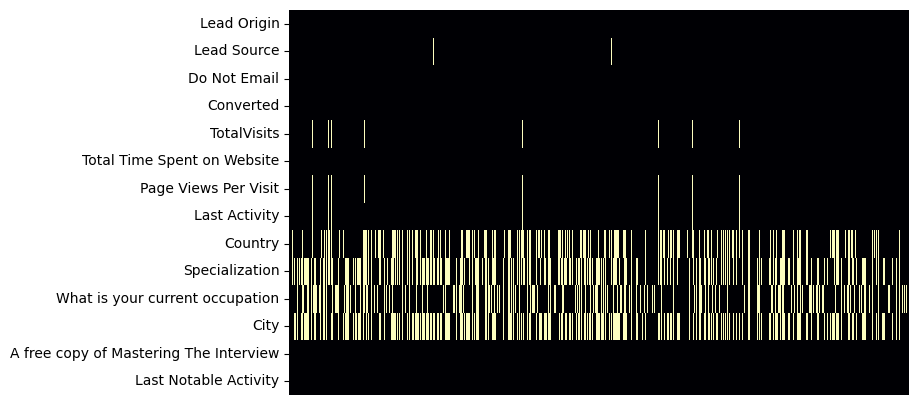

In [18]:
plt.figure(figsize=(8,5))
sns.heatmap(df1.isnull().T, cmap='magma', cbar=False, xticklabels=False)
plt.show()

In [19]:
df1['Converted'].value_counts() # imbalanced dataset: safe to drop rows with nulls where leads are not converted

0    5679
1    3561
Name: Converted, dtype: int64

In [20]:
# Scope for removing 2118 rows
nullBlocks = df1[df1.isnull().any(axis=1)].index.tolist()
target0 = df1[df1['Converted'] == 0].index.tolist()

# Find intersection
intersection = list(set(nullBlocks).intersection(target0))
len(intersection) # Specialisation seems to be of much relevance than other proportionally high features with missing value

3611

In [21]:
from tabulate import tabulate 

for column in df1.columns:
     if df1[column].isnull().any():
        print(f'Column: {column}')
 
        freq_table = df1[column].value_counts().reset_index()
        freq_table.columns = [column, 'Frequency']
        print(tabulate(freq_table, headers='keys', tablefmt='psql'), end = '\n\n')
        
        missing_info = pd.DataFrame(df1[column]).isnull().sum().to_frame('Missing Values')
        print(missing_info, '\n\n\n')

Column: Lead Source
+----+-------------------+-------------+
|    | Lead Source       |   Frequency |
|----+-------------------+-------------|
|  0 | Google            |        2868 |
|  1 | Direct Traffic    |        2543 |
|  2 | Olark Chat        |        1755 |
|  3 | Organic Search    |        1154 |
|  4 | Reference         |         534 |
|  5 | Welingak Website  |         142 |
|  6 | Referral Sites    |         125 |
|  7 | Facebook          |          55 |
|  8 | bing              |           6 |
|  9 | google            |           5 |
| 10 | Click2call        |           4 |
| 11 | Press_Release     |           2 |
| 12 | Social Media      |           2 |
| 13 | Live Chat         |           2 |
| 14 | youtubechannel    |           1 |
| 15 | testone           |           1 |
| 16 | Pay per Click Ads |           1 |
| 17 | welearnblog_Home  |           1 |
| 18 | WeLearn           |           1 |
| 19 | blog              |           1 |
| 20 | NC_EDM            |           

In [22]:
print(f"Graduates: {df1.loc[df1['What is your current occupation'] == 'Unemployed']['Specialization'].isna().sum()}")
print(f"Service Sector: {df1.loc[df1['What is your current occupation'] == 'Working Professional']['Specialization'].isna().sum()}")
print(f"Learners: {df1.loc[df1['What is your current occupation'] == 'Student']['Specialization'].isna().sum()}")
print(f"Other: {df1.loc[df1['What is your current occupation'] == 'Other']['Specialization'].isna().sum()}")
print(f"Transitioning: {df1.loc[df1['What is your current occupation'] == 'Housewife']['Specialization'].isna().sum()}")
print(f"Entrepreneurs: {df1.loc[df1['What is your current occupation'] == 'Businessman']['Specialization'].isna().sum()}")

Graduates: 1828
Service Sector: 31
Learners: 85
Other: 1
Transitioning: 0
Entrepreneurs: 2


In [23]:
unemp_idx = df1.loc[(df1['What is your current occupation'] == 'Unemployed') & df1['Specialization'].isna()].index
df1.loc[unemp_idx, 'Specialization'] = 'Graduates'

workp_idx = df1.loc[(df1['What is your current occupation'] == 'Working Professional') & df1['Specialization'].isna()].index
df1.loc[workp_idx, 'Specialization'] = 'Service Sector'

student_idx = df1.loc[(df1['What is your current occupation'] == 'Student') & df1['Specialization'].isna()].index
df1.loc[student_idx, 'Specialization'] = 'Learners'

# Check the count of NaN values in the 'Specialization' column
print(df1['Specialization'].isna().sum())

1436


In [24]:
naRows = df1[df1['Specialization'].isna()].any(axis=1).index.tolist()

dropRows = list(set(naRows).intersection(target0))
print(len(dropRows))
df1.drop(index=dropRows, inplace=True)

1283


In [25]:
df1.isna().any()

Lead Origin                               False
Lead Source                                True
Do Not Email                              False
Converted                                 False
TotalVisits                                True
Total Time Spent on Website               False
Page Views Per Visit                       True
Last Activity                              True
Country                                    True
Specialization                             True
What is your current occupation            True
City                                       True
A free copy of Mastering The Interview    False
Last Notable Activity                     False
dtype: bool

In [26]:
# imputing columns where missing values are less
modeLeadScore = df1['Lead Source'].mode()[0]
modeTotalVisits = df1['TotalVisits'].mode()[0]
modePageViewsPerVisit = df1['Page Views Per Visit'].mode()[0]
modeLastActivity = df1['Last Activity'].mode()[0]

# fill null values
df1['Lead Source'].fillna(modeLeadScore, inplace=True)
df1['TotalVisits'].fillna(modeTotalVisits, inplace=True)
df1['Page Views Per Visit'].fillna(modePageViewsPerVisit, inplace=True)
df1['Last Activity'].fillna(modeLastActivity, inplace=True)

In [27]:
# imputing nan values for Country with India since the company most likely to derive national applicants
modeCountry = df1['Country'].mode()[0]
df1['Country'] = df1['Country'].replace(np.nan, modeCountry)

# creating overseas vs national category (other countries are sparse) and dropping original feature
df1['Nationals'] = np.where(df1['Country'] == 'India', 'National', 'Overseas')

df1.drop(columns='Country', inplace=True)

In [28]:
for column in df1.columns:
     if df1[column].isnull().any():
        print(f'Column: {column}')
 
        freq_table = df1[column].value_counts().reset_index()
        freq_table.columns = [column, 'Frequency']
        print(tabulate(freq_table, headers='keys', tablefmt='psql'), end = '\n\n')
        
        missing_info = pd.DataFrame(df1[column]).isnull().sum().to_frame('Missing Values')
        print(missing_info, '\n\n\n')

Column: Specialization
+----+-----------------------------------+-------------+
|    | Specialization                    |   Frequency |
|----+-----------------------------------+-------------|
|  0 | Graduates                         |        1828 |
|  1 | Finance Management                |         976 |
|  2 | Human Resource Management         |         848 |
|  3 | Marketing Management              |         838 |
|  4 | Operations Management             |         503 |
|  5 | Business Administration           |         403 |
|  6 | IT Projects Management            |         366 |
|  7 | Supply Chain Management           |         349 |
|  8 | Banking, Investment And Insurance |         338 |
|  9 | Media and Advertising             |         203 |
| 10 | Travel and Tourism                |         203 |
| 11 | International Business            |         178 |
| 12 | Healthcare Management             |         159 |
| 13 | Hospitality Management            |         114 |
| 14 | E

In [29]:
df1['Converted'].value_counts() # 835

0    4396
1    3561
Name: Converted, dtype: int64

In [30]:
df1.loc[df1['Specialization'].isna(), 'Specialization'] = df1['Specialization'].replace(np.nan, 'Unknown')

In [31]:
occupationNA = df1[df1['What is your current occupation'].isna()].any(axis=1).index
rowsDrop = list(set(occupationNA).intersection(target0))
print(len(rowsDrop)) # this will deplete information

1039


In [32]:
learned_mask = df1[(df1['Specialization'] != 'Unknown') & df1['What is your current occupation'].isna()].index
df1.loc[learned_mask, 'What is your current occupation'] = 'Working Professional'

In [33]:
df1.loc[df1['What is your current occupation'].isna(), 'What is your current occupation'] = df1['What is your current occupation'].replace(np.nan, 'Unemployed')

In [34]:
df1['Nationals'].value_counts()

National    7691
Overseas     266
Name: Nationals, dtype: int64

In [35]:
df1[df1['Nationals'] == 'Overseas']['City'].value_counts() # Labeled wrong: no catrgory assigned for overseas candidates

Mumbai                         93
Other Cities                   67
Other Cities of Maharashtra    23
Thane & Outskirts              21
Other Metro Cities             20
Tier II Cities                  3
Name: City, dtype: int64

In [36]:
df1[df1['City'].isna() & df1['Nationals']]['Nationals'].value_counts()

National    2372
Overseas      39
Name: Nationals, dtype: int64

In [37]:
df1.loc[df1['Nationals'] == 'Overseas','City'] = 'Outside India' #(Overseas Candidates)

In [38]:
df1['City'].value_counts() # this makes the national column not useful

Mumbai                         3118
Thane & Outskirts               727
Other Cities                    614
Other Cities of Maharashtra     430
Other Metro Cities              359
Outside India                   266
Tier II Cities                   71
Name: City, dtype: int64

In [39]:
df1.drop(labels='Nationals', axis=1, inplace=True)

In [40]:
df1['City'] = df1['City'].fillna('Mumbai') # assuming more people from the place of organisation

In [41]:
df1.isna().sum().sum()

0

In [42]:
df1.duplicated().sum()

1060

In [43]:
df1 = df1.drop_duplicates(keep='first')

In [44]:
df1.shape

(6897, 13)

In [45]:
df2 = df1.copy(deep=True)

In [46]:
df2['Converted'].value_counts() # imbalanced

0    3967
1    2930
Name: Converted, dtype: int64

<Figure size 900x500 with 0 Axes>

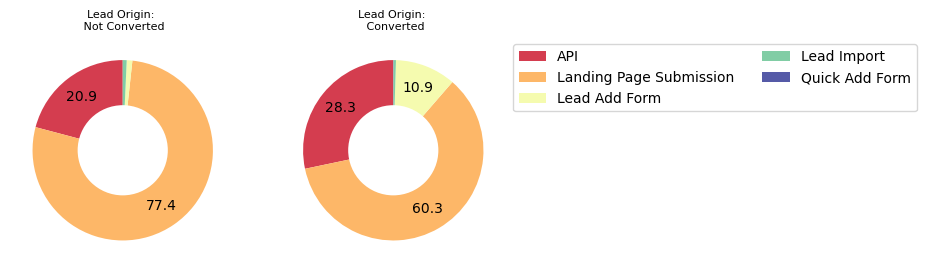

<Figure size 900x500 with 0 Axes>

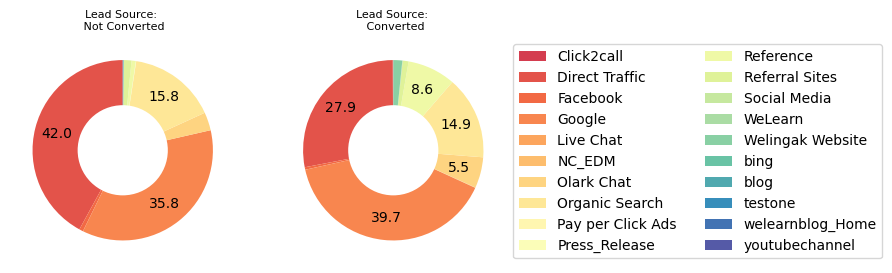

<Figure size 900x500 with 0 Axes>

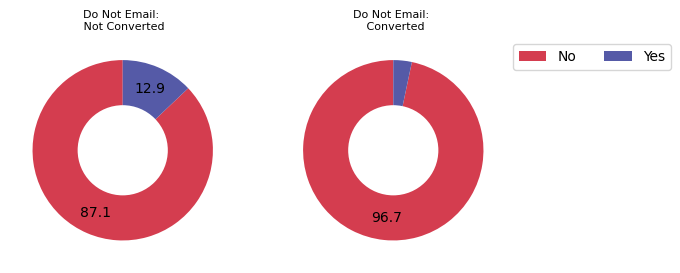

<Figure size 900x500 with 0 Axes>

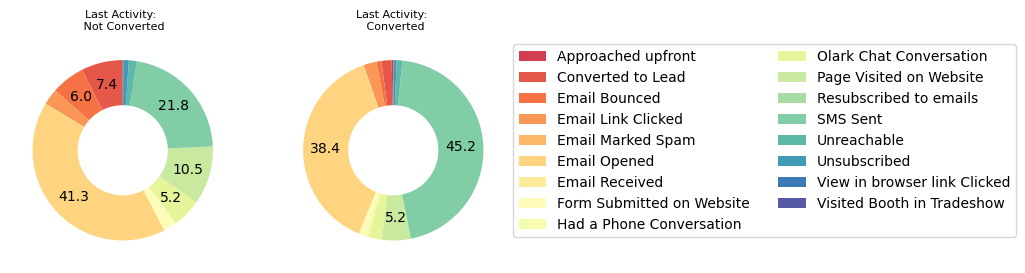

<Figure size 900x500 with 0 Axes>

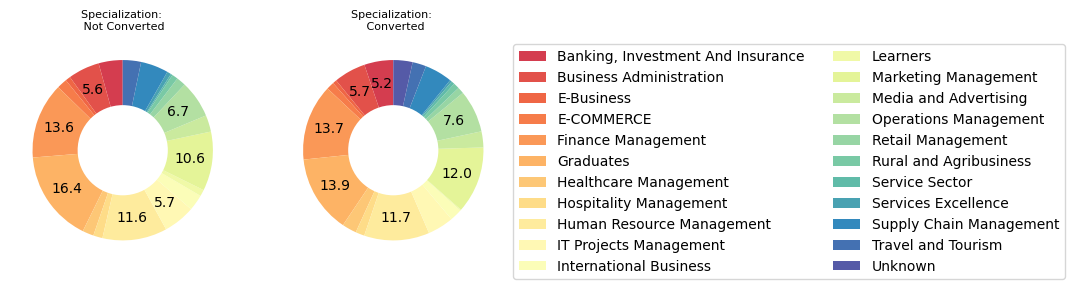

<Figure size 900x500 with 0 Axes>

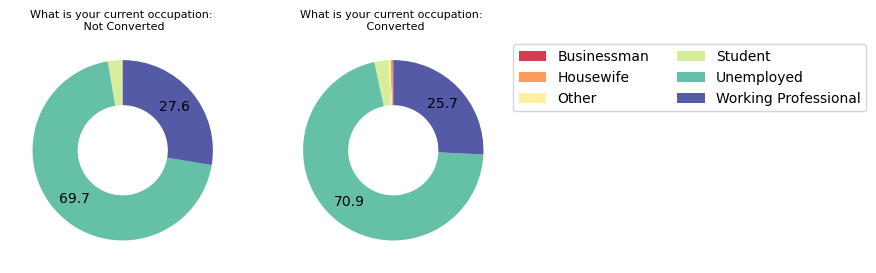

<Figure size 900x500 with 0 Axes>

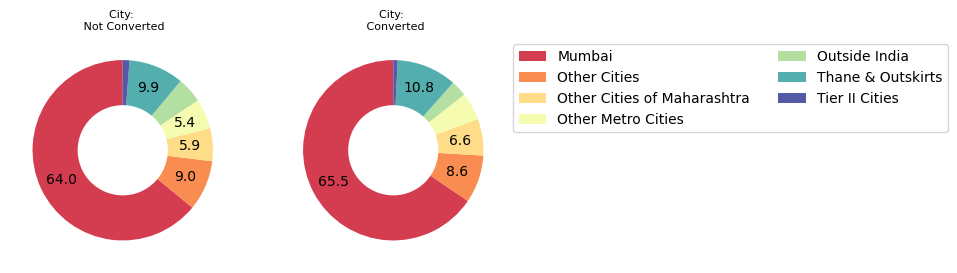

<Figure size 900x500 with 0 Axes>

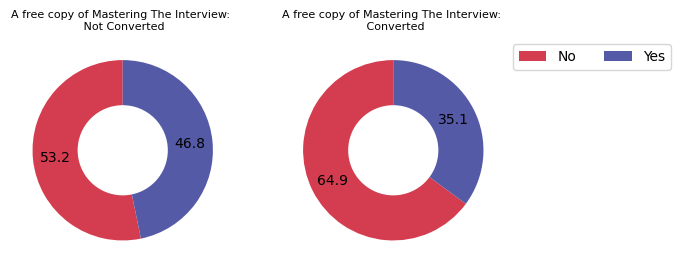

<Figure size 900x500 with 0 Axes>

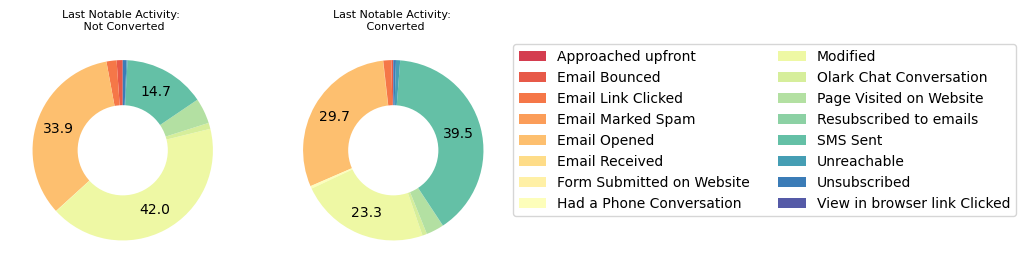

In [47]:
for column in df2.columns:
    if not pd.api.types.is_numeric_dtype(df2[column]):
        
        plt.figure(figsize=(9,5))
        fig, ax = plt.subplots(nrows=1, ncols=2)
        
        colormap = plt.cm.Spectral
        patches = df2[column].nunique()
        colors = [colormap(i) for i in np.linspace(0.1, 0.98, patches)]
        
        percent_formatter = lambda pct, allvals: '' if pct < 5 else "{:.1f}".format(pct)   
        
        counts = df2.groupby(['Converted', column]).size().unstack(fill_value=0)
        proportion_NC = counts.loc[0]

        wedge_i, autotext_i, text_i = ax[0].pie(proportion_NC, colors=colors, autopct=lambda pct: percent_formatter(pct, proportion_NC), pctdistance=0.75, startangle=90)

        CenterCircle_i = plt.Circle((0, 0), 0.5, fc='white')
        ax[0].add_artist(CenterCircle_i)
        
        ax[0].set_title(f'{column}: \n Not Converted', fontdict={'fontsize':8, 'fontweight': 12})
        
        proportion_C = counts.loc[1]
        
        wedge_ii, autotext_ii, text_ii = ax[1].pie(proportion_C, colors=colors, autopct=lambda pct: percent_formatter(pct, proportion_C), pctdistance=0.75, startangle=90)

        CenterCircle_ii = plt.Circle((0, 0), 0.5, fc='white')
        ax[1].add_artist(CenterCircle_ii)
        
        ax[1].set_title(f'{column}: \n Converted', fontdict={'fontsize':8, 'fontweight': 12})
        ax[1].legend(wedge_ii, proportion_C.index, ncols=2, loc='upper left', bbox_to_anchor=(1, 1))
        
        plt.show()
        
plt.close('all')

In [48]:
df2.describe(include='number', percentiles=[0.5, 0.75, 0.85, 0.9, 0.95])

Converted  TotalVisits  Total Time Spent on Website  \
count   6897.000     6897.000                     6897.000   
mean       0.425        4.298                      621.828   
std        0.494        5.128                      554.862   
min        0.000        0.000                        0.000   
50%        0.000        3.000                      386.000   
75%        1.000        5.000                     1106.000   
85%        1.000        7.000                     1335.000   
90%        1.000        8.000                     1461.400   
95%        1.000       10.000                     1618.200   
max        1.000      251.000                     2272.000   

       Page Views Per Visit  
count              6897.000  
mean                  2.973  
std                   2.036  
min                   0.000  
50%                   2.500  
75%                   4.000  
85%                   5.000  
90%                   5.000  
95%                   6.364  
max                  55.000

In [49]:
df2.sort_values(by=['TotalVisits', 'Page Views Per Visit']).tail()

Lead Origin     Lead Source Do Not Email  Converted  \
2190  Landing Page Submission  Direct Traffic          Yes          0   
5283  Landing Page Submission  Direct Traffic          Yes          0   
5608  Landing Page Submission  Referral Sites          Yes          0   
2322  Landing Page Submission  Direct Traffic          Yes          0   
6102  Landing Page Submission  Direct Traffic           No          1   

      TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
2190         55.0                          297                 55.00   
5283         74.0                         1209                 12.33   
5608        115.0                          187                  8.21   
2322        141.0                          755                  6.71   
6102        251.0                           49                  1.48   

                Last Activity             Specialization  \
2190  Page Visited on Website     IT Projects Management   
5283  Page Visited on Website                  Graduates   
5608  Page Visited on Website     Rural and Agribusiness   
2322  Page Visited on Website  Human Resource Management   
6102  Page Visited on Website    Supply Chain Management   

     What is your current occupation               City  \
2190                      Unemployed       Other Cities   
5283                      Unemployed  Thane & Outskirts   
5608                      Unemployed             Mumbai   
2322            Working Professional             Mumbai   
6102                      Unemployed             Mumbai   

     A free copy of Mastering The Interview    Last Notable Activity  
2190                                    Yes                 Modified  
5283                                     No  Page Visited on Website  
5608                                     No  Page Visited on Website  
2322                                    Yes  Page Visited on Website  
6102                                    Yes  Page Visited on Website

TotalVisits Skewness before outlier handling: 21.702390600911748
Number of outliers in TotalVisits: 439
TotalVisits Skewness after outlier handling: 0.7469667569901678
Total Time Spent on Website Skewness before outlier handling: 0.6369394238375315
Number of outliers in Total Time Spent on Website: 0
Total Time Spent on Website Skewness after outlier handling: 0.6369394238375315
Page Views Per Visit Skewness before outlier handling: 3.9254160543529104
Number of outliers in Page Views Per Visit: 203
Page Views Per Visit Skewness after outlier handling: 0.6826363697851658


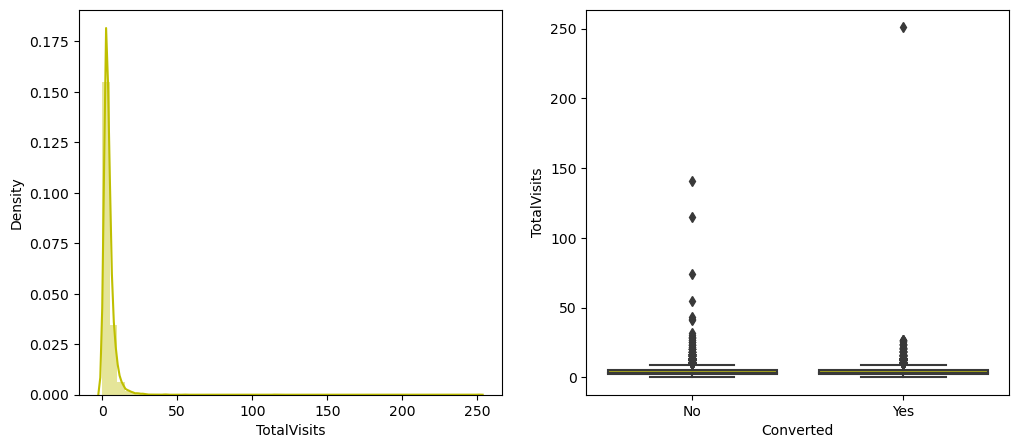

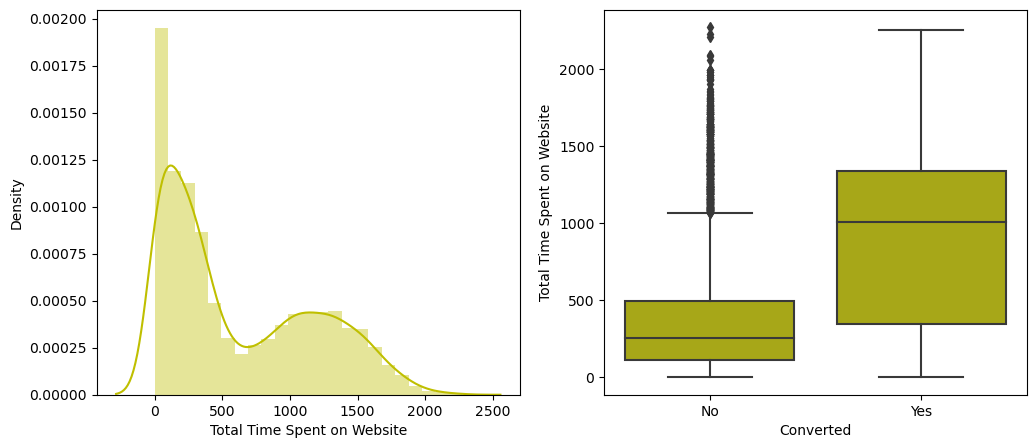

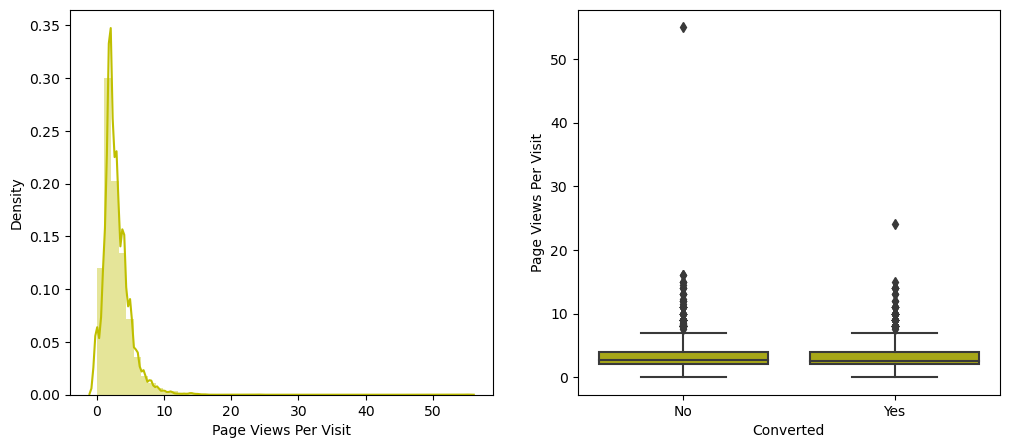

In [50]:
for column in df2.columns:
    if column == 'Converted':
        continue

    if pd.api.types.is_numeric_dtype(df2[column]):
        fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

        # Plot distribution
        sns.distplot(df2[column], kde=True, color='y', ax=ax[0])

        # Plot boxplot
        sns.boxplot(data=df2, x='Converted', y=column, color='y', ax=ax[1])
        ax[1].set_xticklabels(['No', 'Yes'])  # to be treated after splitting data

        print(f"{column} Skewness before outlier handling:", df2[column].skew())

        # Identify and handle outliers
        iqr = df2[column].quantile(0.75) - df2[column].quantile(0.25)
        cutoff = iqr * 1.5

        upper_bound = df2[column].quantile(0.75) + cutoff
        lower_bound = df2[column].quantile(0.25) - cutoff

        outliers = (df2[column] > upper_bound) | (df2[column] < lower_bound)

        print(f"Number of outliers in {column}: {outliers.sum()}")

        if outliers.sum() > 0:
            df2.loc[outliers, column] = np.clip(df2.loc[outliers, column], lower_bound, upper_bound)

        print(f"{column} Skewness after outlier handling:", df2[column].skew(), end='\n')

plt.show()

In [51]:
df2[(df2['Last Notable Activity'] == df2['Last Activity']) == True]['Last Activity'].count() # Similar information

4548

In [52]:
df2['Activity Shift'] = (df2['Last Notable Activity'] == df2['Last Activity']).astype(int)

In [53]:
df2.drop(columns='Last Activity', inplace=True)

In [54]:
df2['TotalVisits_bins'] = pd.cut(df2['TotalVisits'], 5, labels=['none', 'rare', 'often', 'frequent', 'high'])

In [55]:
df2['TotalTimeSpentonWebsite_bins'] = pd.cut(df2['Total Time Spent on Website'], 5, labels=['minute', 'readview', 'substantial', 'large', 'extreme'])

In [56]:
df2['PageViewsPerVisit_bins'] = pd.cut(df2['Page Views Per Visit'], 5, labels=['none', 'limited', 'few', 'several', 'most'])

In [57]:
df3 = df2.copy()

In [58]:
df3 = df3.drop(columns=['Total Time Spent on Website', 'TotalVisits', 'Page Views Per Visit'])

In [59]:
# Reducing categories that are below 1%
low_count_categories = {}

for column in df3.columns:
        
        print(f'{column}')
        count = df3[column].value_counts()
        percent = round(df2[column].value_counts(normalize=True), 3)
        
        table = pd.concat([count,  percent], axis=1)
        table.columns = ['Counts', 'Percent']
        
        table = table.sort_values(by='Counts', ascending=False)
        
        table['Cumulative Count'] = table['Counts'].cumsum()
        table['Cumulative Percent'] = table['Percent'].mul(100).cumsum()
        
        table['Cumulative Percent'] = round(table['Cumulative Percent'],2).astype(str) +  ' %'
        
        print(tabulate(table, headers='keys', tablefmt='psql'))
        print('\n\n')
            
        transform_category = table['Percent'] < 0.05
        low_count_category = table[transform_category].index.tolist()
        
        if low_count_category:
            low_count_categories[column] = low_count_category

print("Low Count Categories:")
print(low_count_categories)

Lead Origin
+-------------------------+----------+-----------+--------------------+----------------------+
|                         |   Counts |   Percent |   Cumulative Count | Cumulative Percent   |
|-------------------------+----------+-----------+--------------------+----------------------|
| Landing Page Submission |     4839 |     0.702 |               4839 | 70.2 %               |
| API                     |     1657 |     0.24  |               6496 | 94.2 %               |
| Lead Add Form           |      359 |     0.052 |               6855 | 99.4 %               |
| Lead Import             |       41 |     0.006 |               6896 | 100.0 %              |
| Quick Add Form          |        1 |     0     |               6897 | 100.0 %              |
+-------------------------+----------+-----------+--------------------+----------------------+



Lead Source
+-------------------+----------+-----------+--------------------+----------------------+
|                   |   Count

In [60]:
for key, value in low_count_categories.items():
    df3[key] = df3[key].replace({val:'Others' for val in value})

In [61]:
df3.duplicated().sum()

1402

In [62]:
df3 = df3.drop_duplicates(keep='first')

In [63]:
df3['Converted'].value_counts(normalize=True)

0    0.545
1    0.455
Name: Converted, dtype: float64

In [64]:
print(f"{round(df3.shape[0]/df0.shape[0]*100,2)}% data retained after data cleaning.")

59.47% data retained after data cleaning.


<Figure size 700x1500 with 0 Axes>

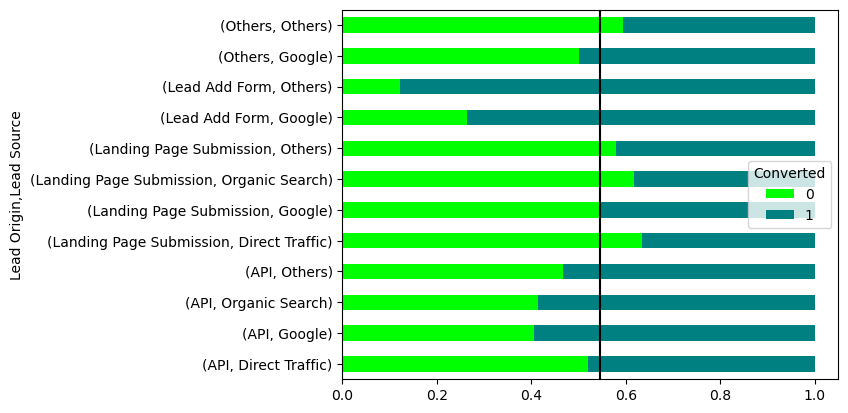

<Figure size 700x1500 with 0 Axes>

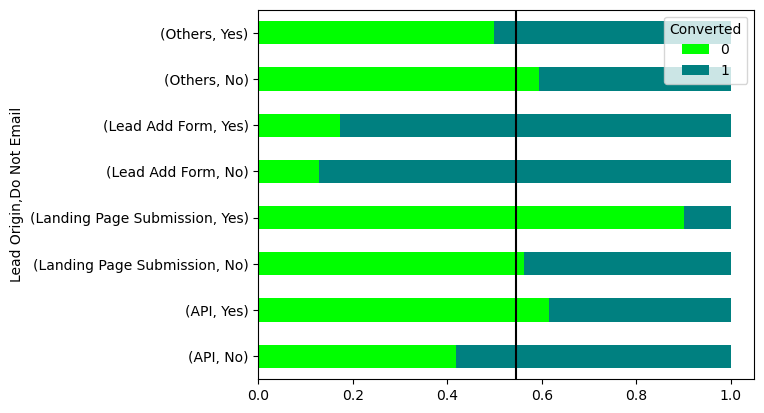

<Figure size 700x1500 with 0 Axes>

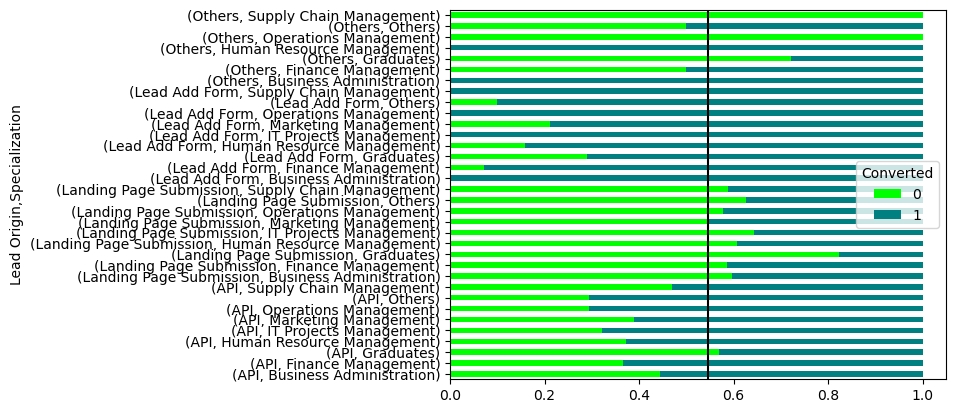

<Figure size 700x1500 with 0 Axes>

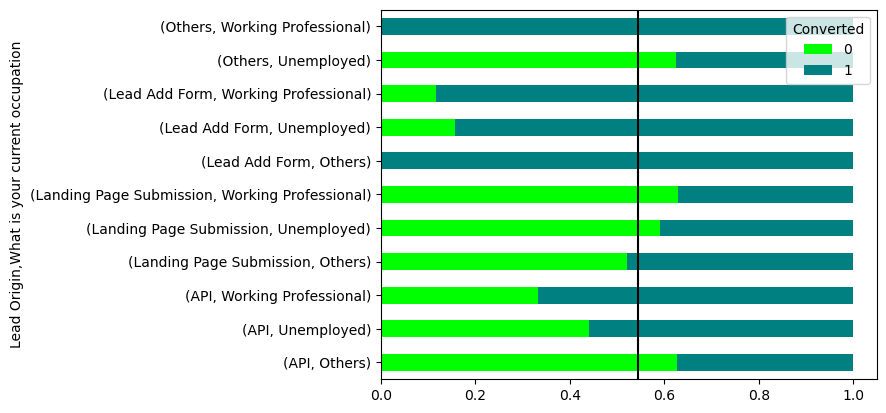

<Figure size 700x1500 with 0 Axes>

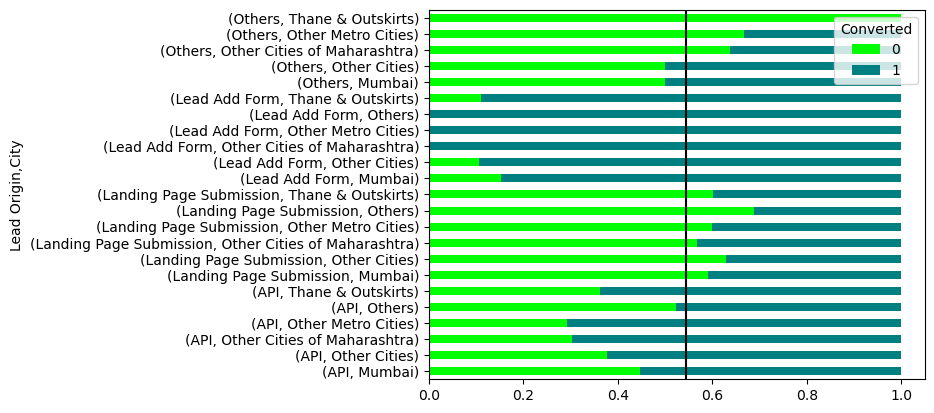

<Figure size 700x1500 with 0 Axes>

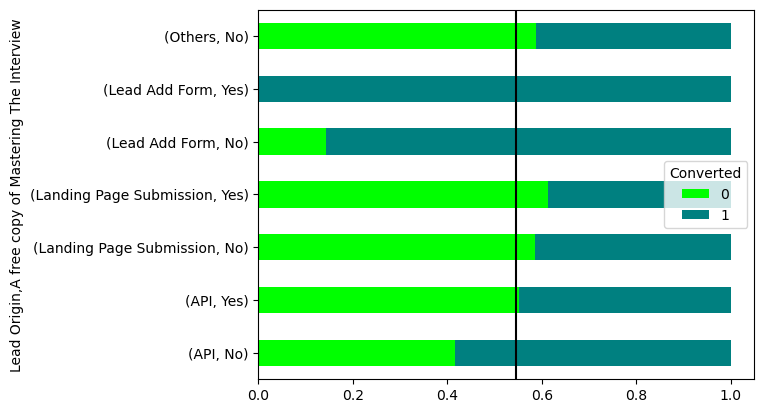

<Figure size 700x1500 with 0 Axes>

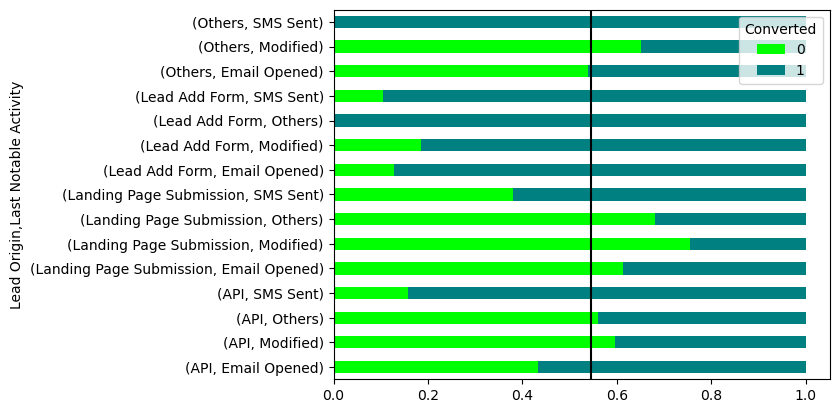

<Figure size 700x1500 with 0 Axes>

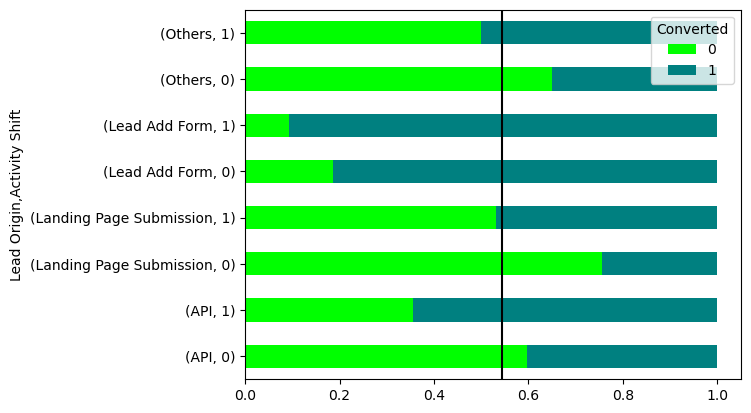

<Figure size 700x1500 with 0 Axes>

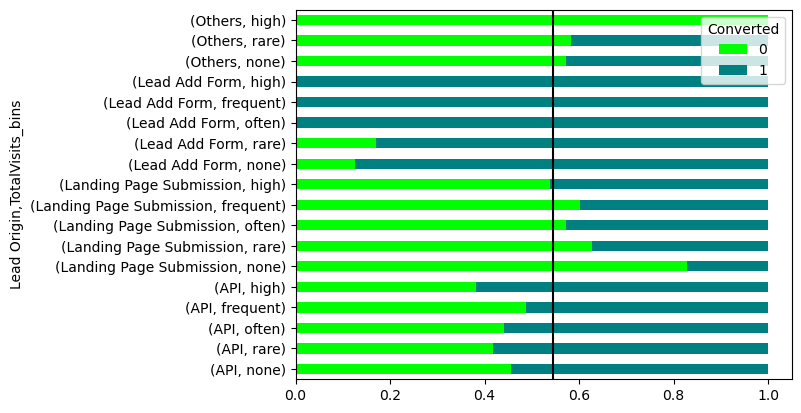

<Figure size 700x1500 with 0 Axes>

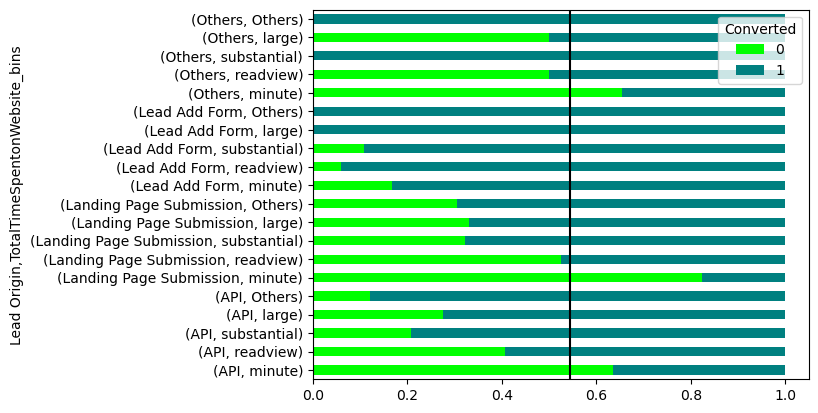

<Figure size 700x1500 with 0 Axes>

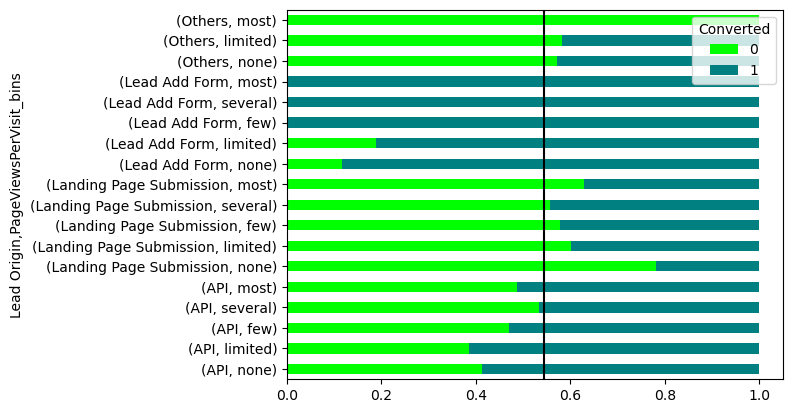

<Figure size 700x1500 with 0 Axes>

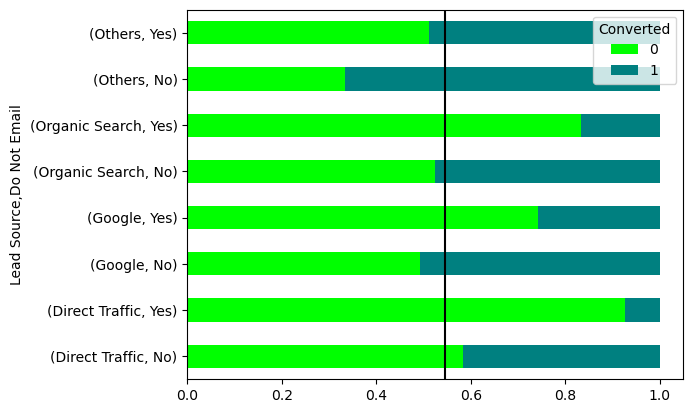

<Figure size 700x1500 with 0 Axes>

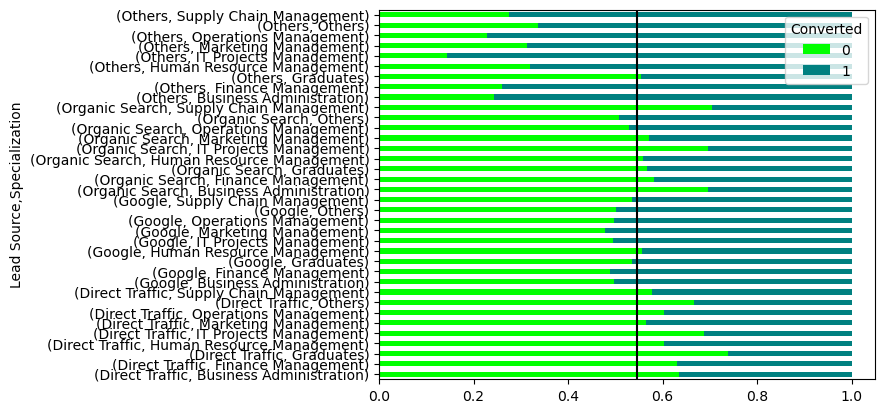

<Figure size 700x1500 with 0 Axes>

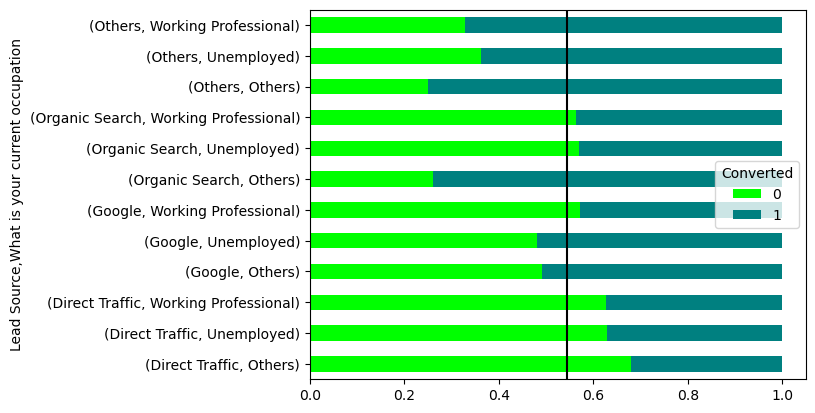

<Figure size 700x1500 with 0 Axes>

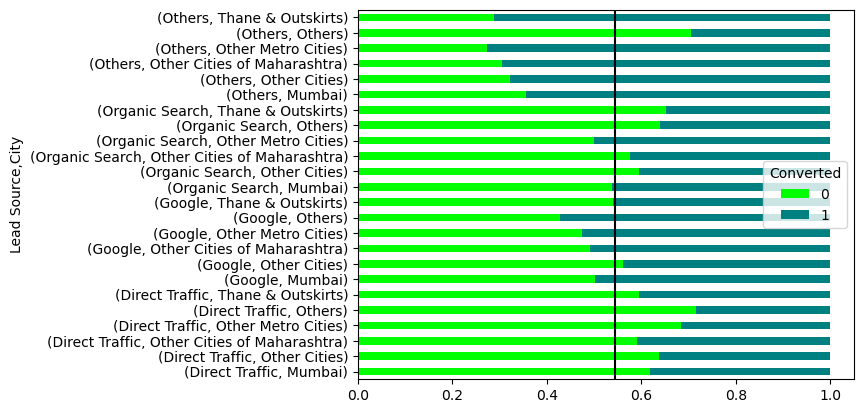

<Figure size 700x1500 with 0 Axes>

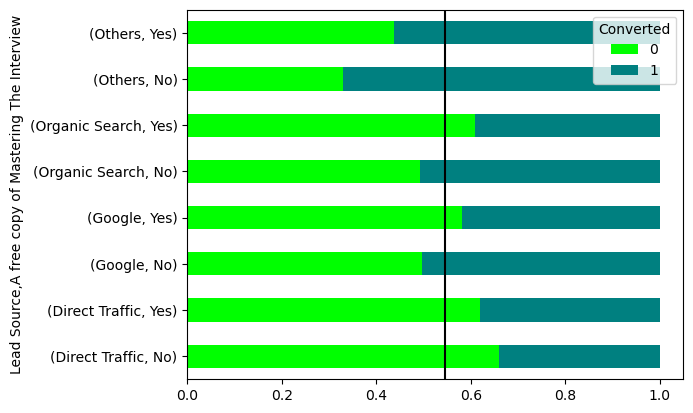

<Figure size 700x1500 with 0 Axes>

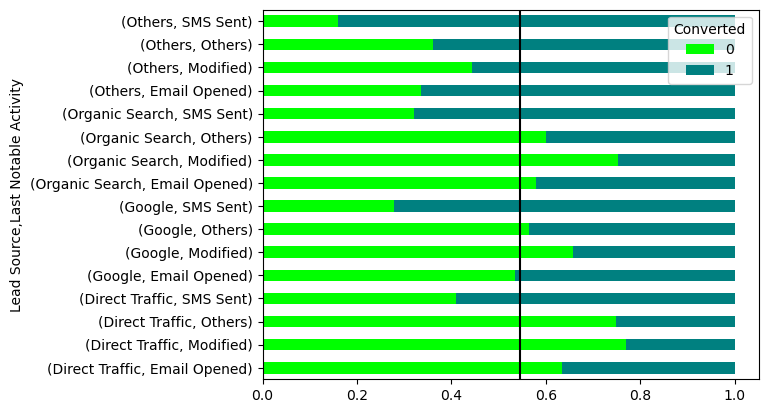

<Figure size 700x1500 with 0 Axes>

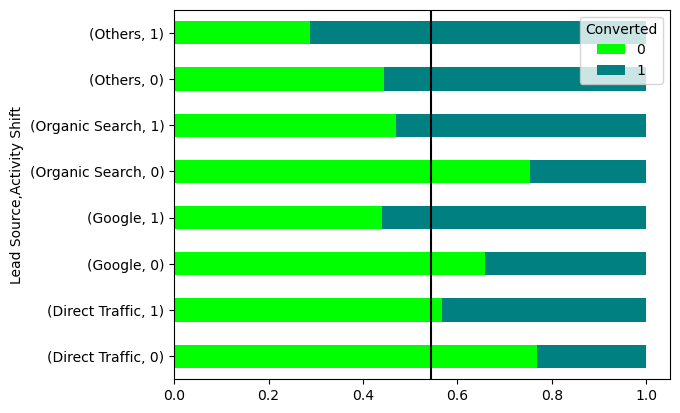

<Figure size 700x1500 with 0 Axes>

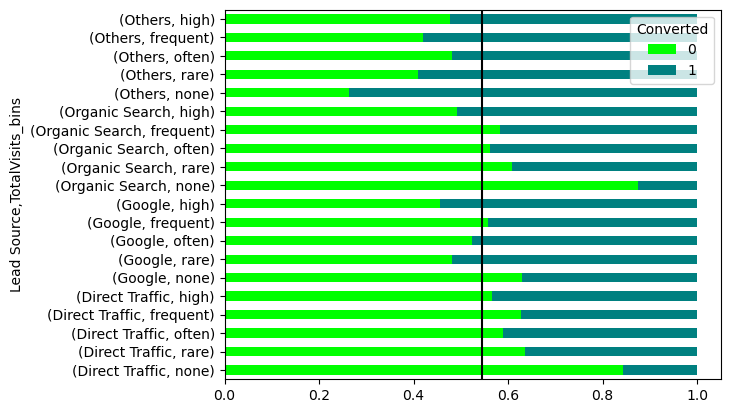

<Figure size 700x1500 with 0 Axes>

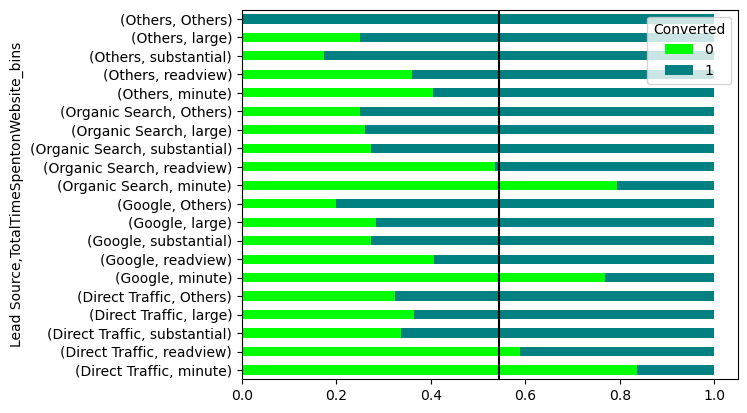

<Figure size 700x1500 with 0 Axes>

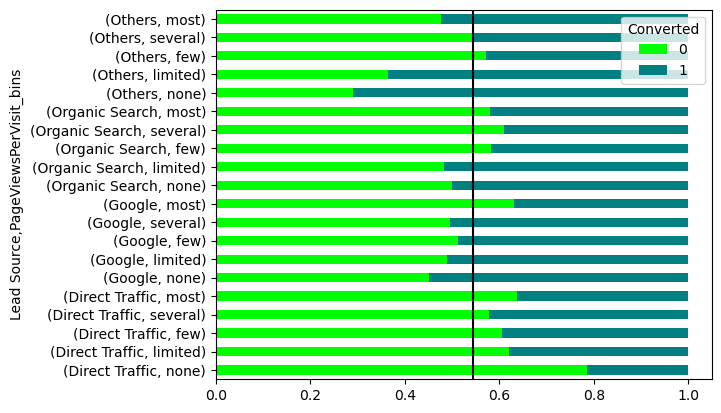

<Figure size 700x1500 with 0 Axes>

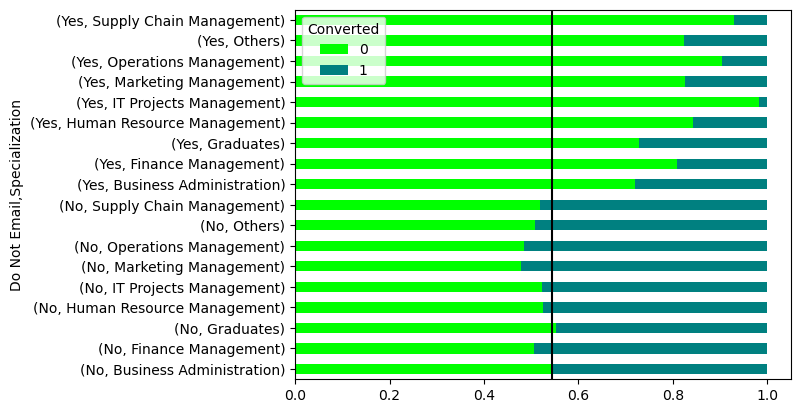

<Figure size 700x1500 with 0 Axes>

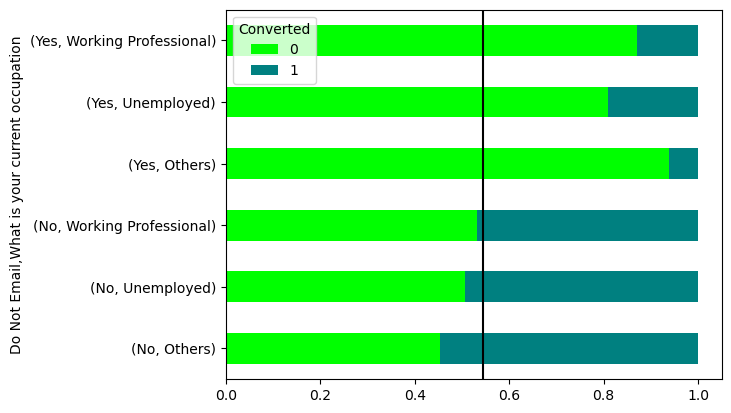

<Figure size 700x1500 with 0 Axes>

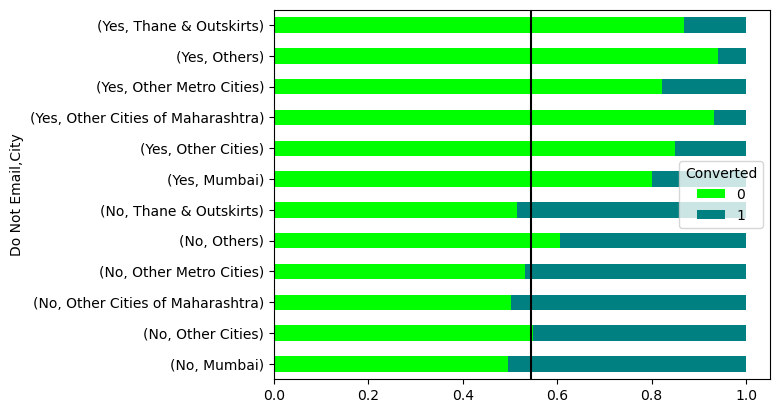

<Figure size 700x1500 with 0 Axes>

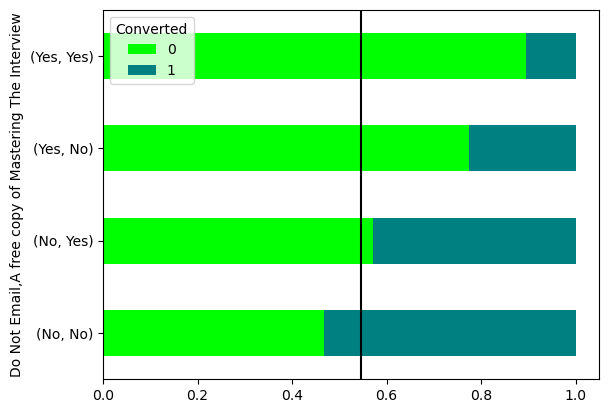

<Figure size 700x1500 with 0 Axes>

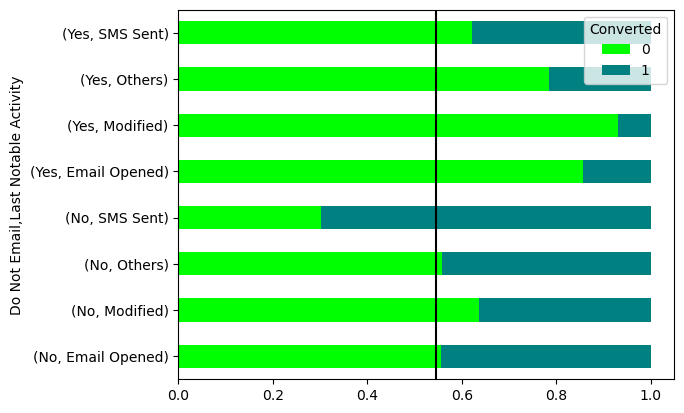

<Figure size 700x1500 with 0 Axes>

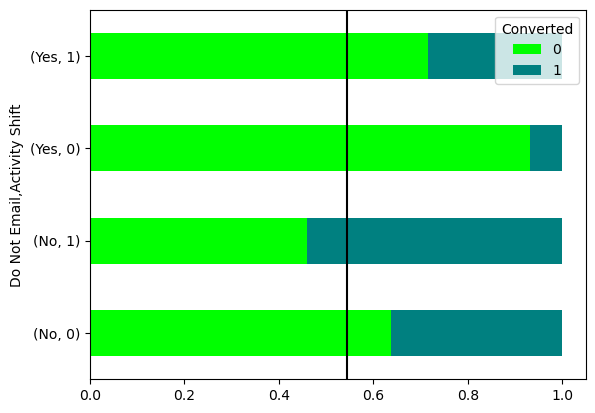

<Figure size 700x1500 with 0 Axes>

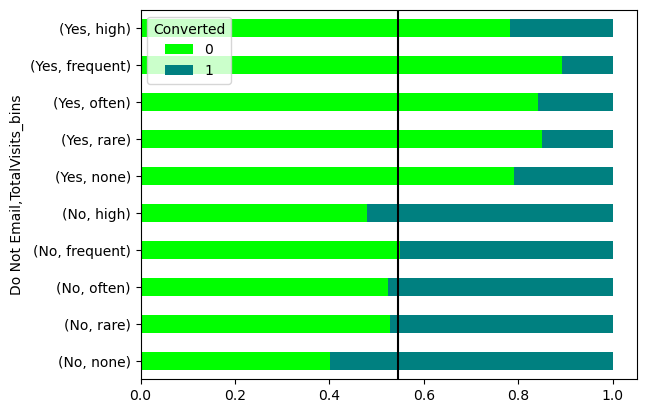

<Figure size 700x1500 with 0 Axes>

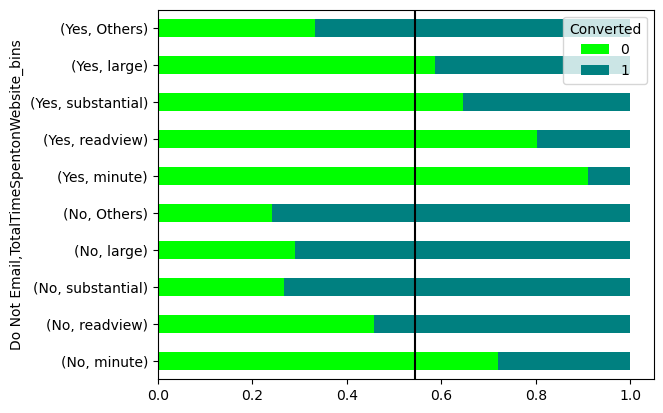

<Figure size 700x1500 with 0 Axes>

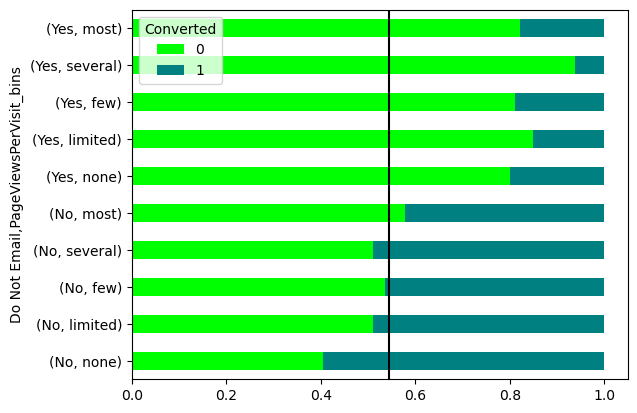

<Figure size 700x1500 with 0 Axes>

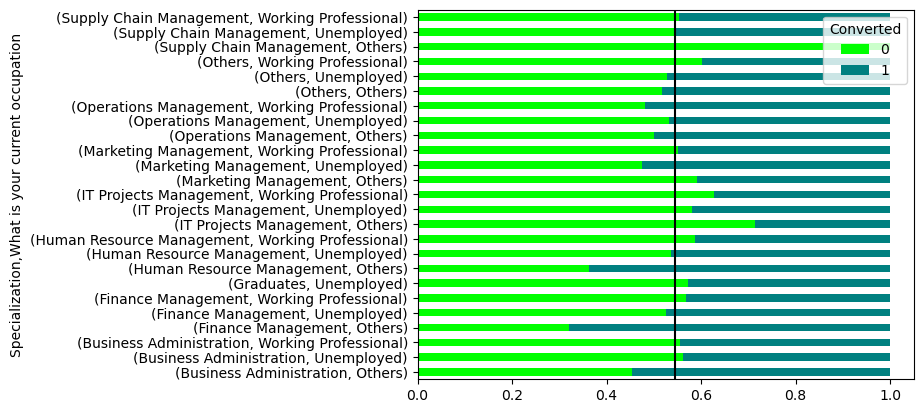

<Figure size 700x1500 with 0 Axes>

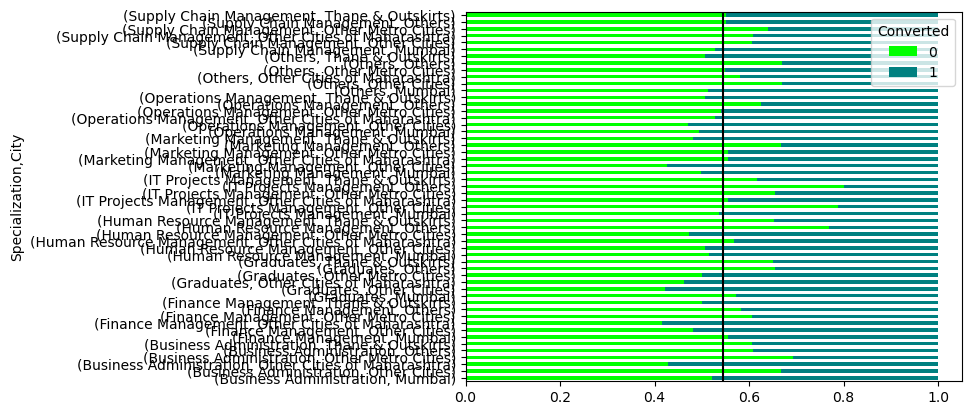

<Figure size 700x1500 with 0 Axes>

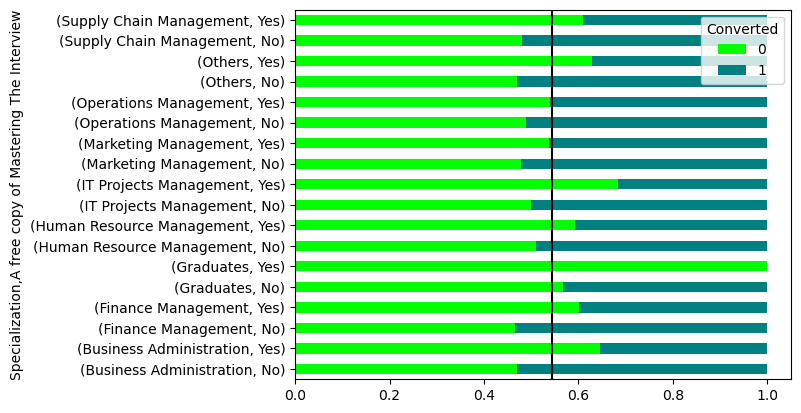

<Figure size 700x1500 with 0 Axes>

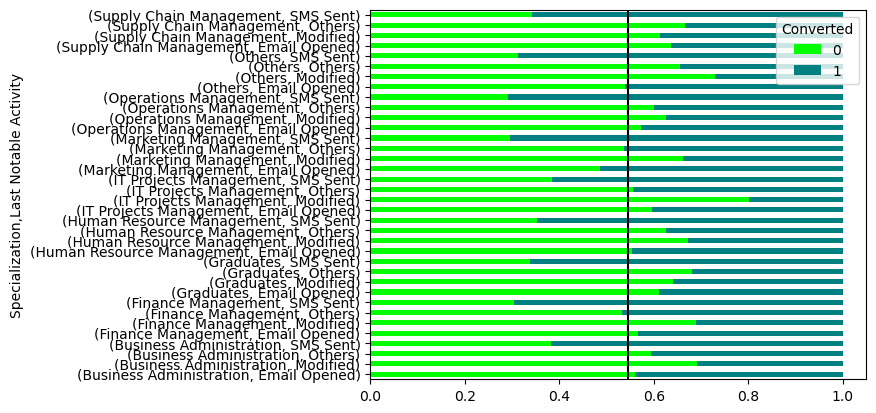

<Figure size 700x1500 with 0 Axes>

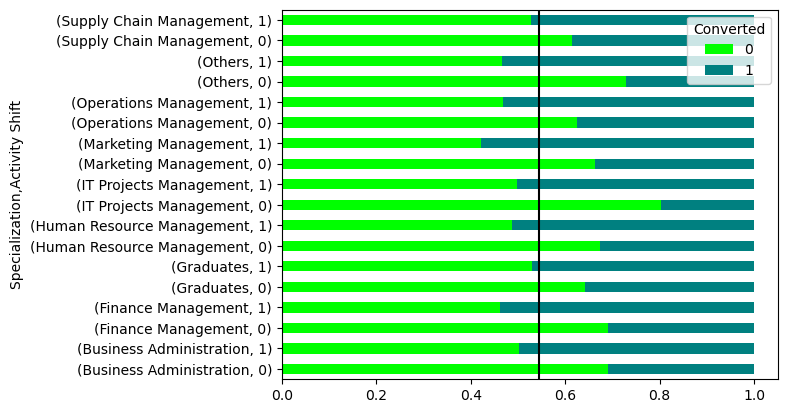

<Figure size 700x1500 with 0 Axes>

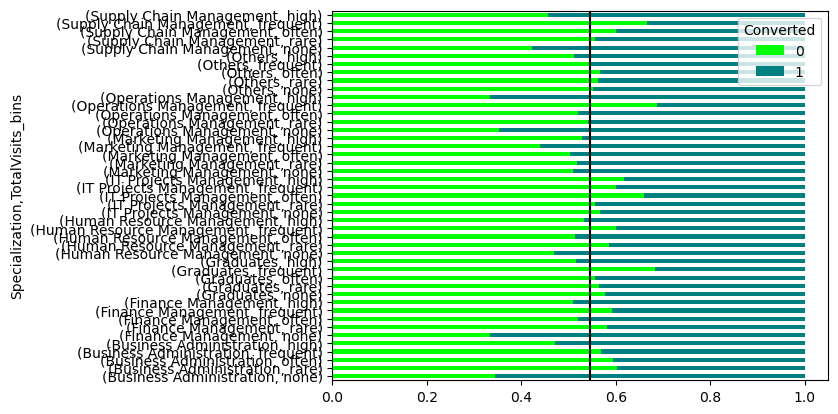

<Figure size 700x1500 with 0 Axes>

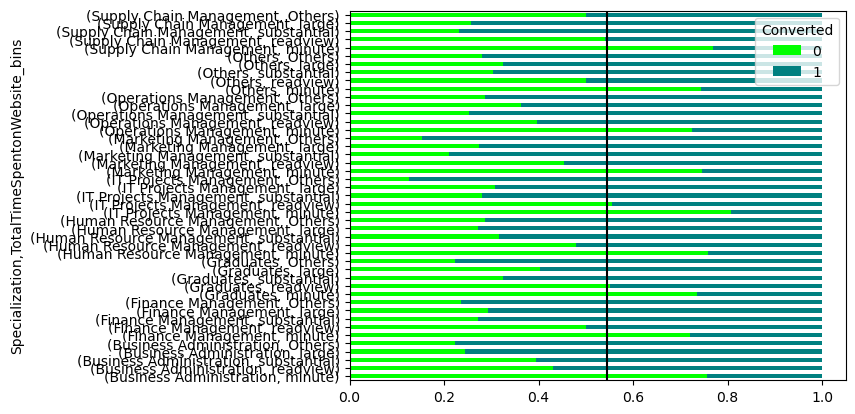

<Figure size 700x1500 with 0 Axes>

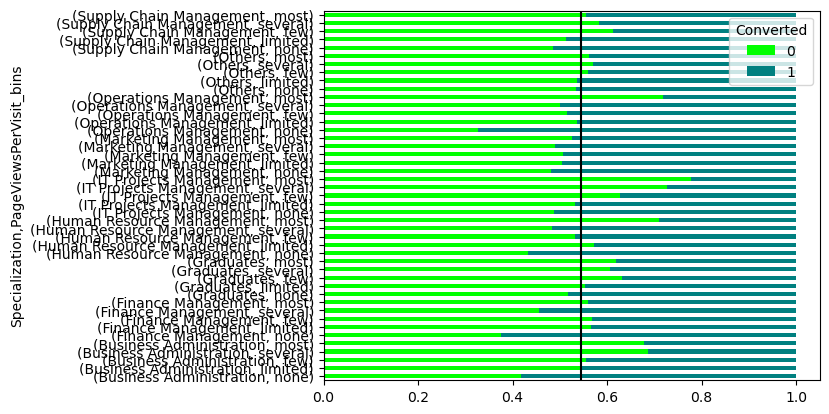

<Figure size 700x1500 with 0 Axes>

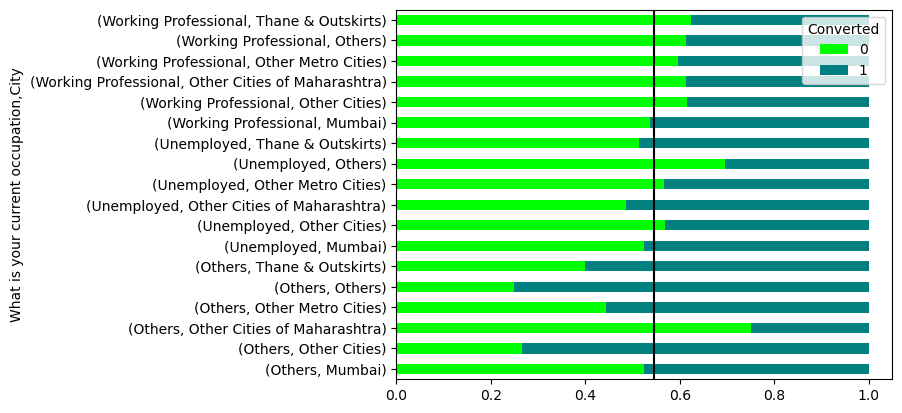

<Figure size 700x1500 with 0 Axes>

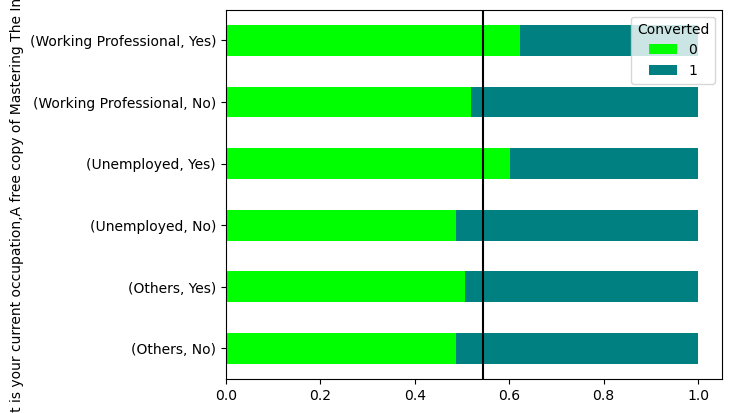

<Figure size 700x1500 with 0 Axes>

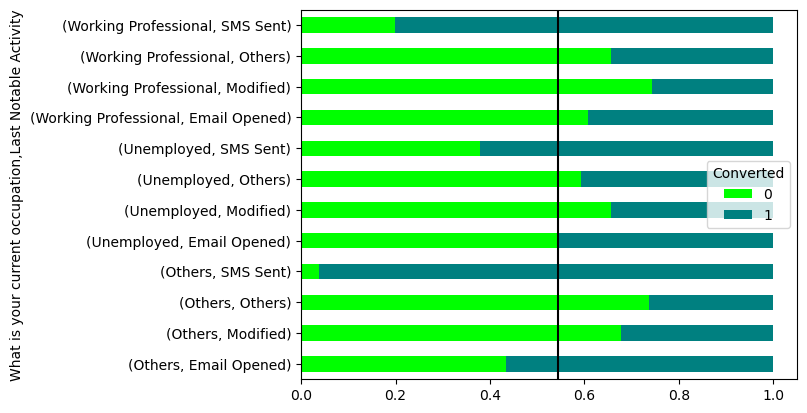

<Figure size 700x1500 with 0 Axes>

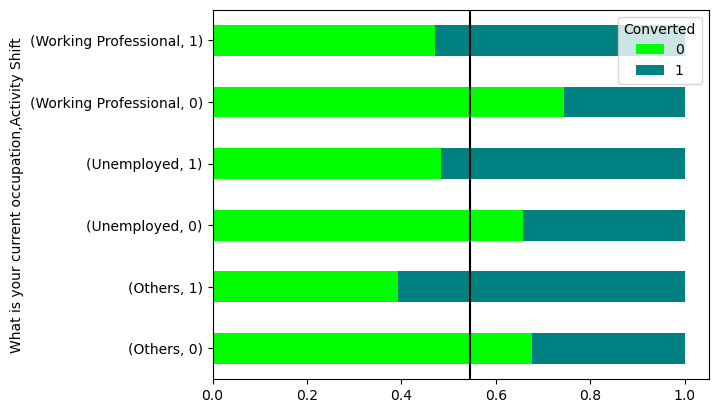

<Figure size 700x1500 with 0 Axes>

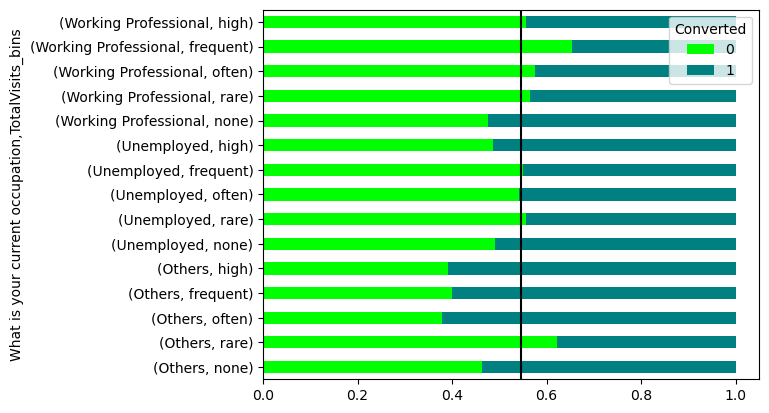

<Figure size 700x1500 with 0 Axes>

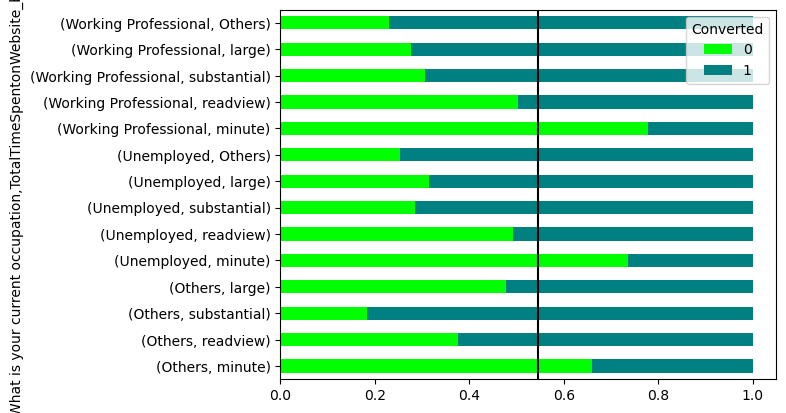

<Figure size 700x1500 with 0 Axes>

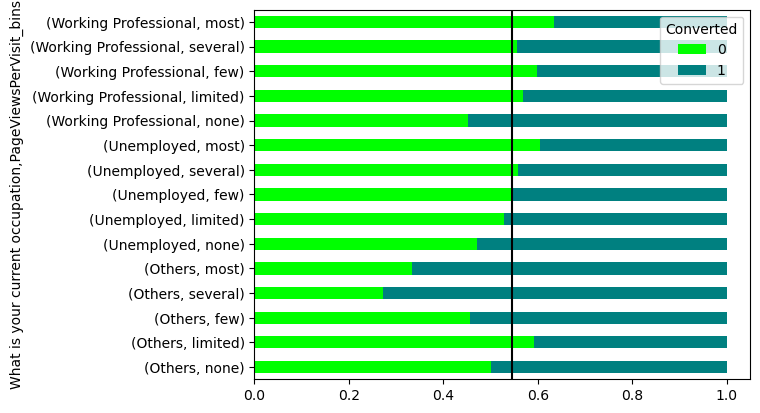

<Figure size 700x1500 with 0 Axes>

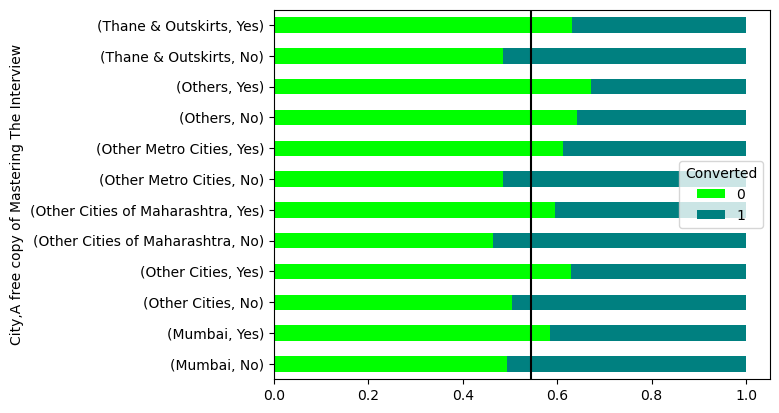

<Figure size 700x1500 with 0 Axes>

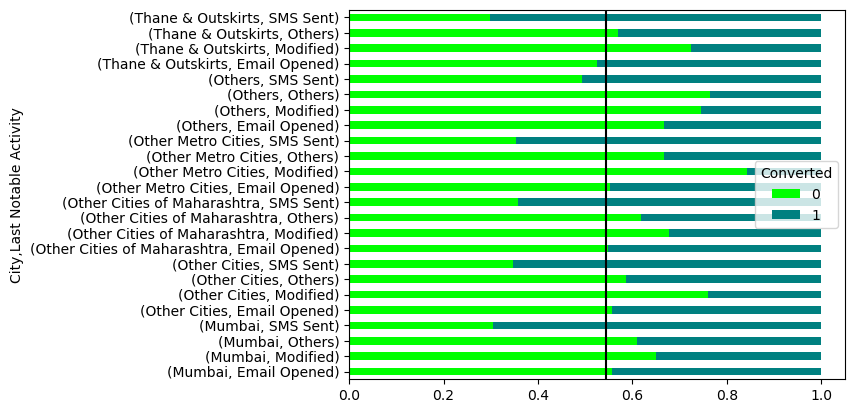

<Figure size 700x1500 with 0 Axes>

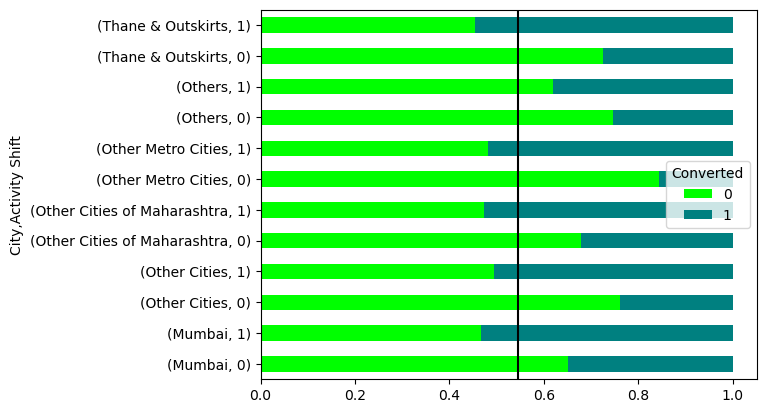

<Figure size 700x1500 with 0 Axes>

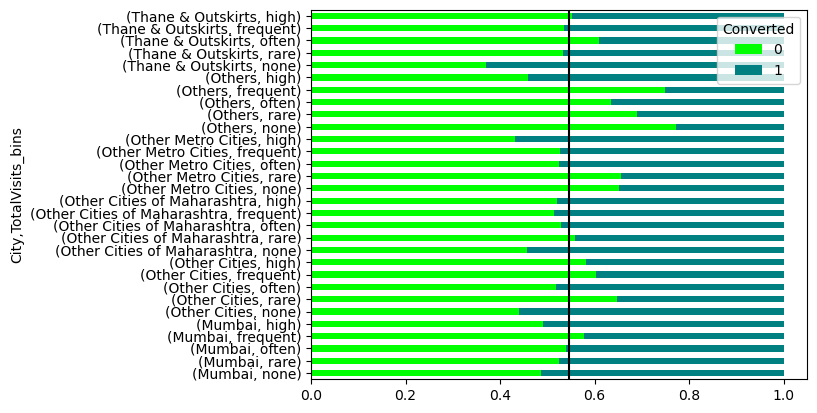

<Figure size 700x1500 with 0 Axes>

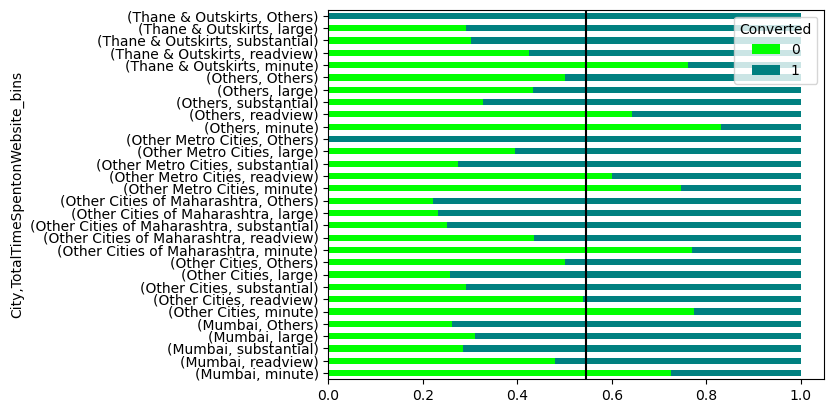

<Figure size 700x1500 with 0 Axes>

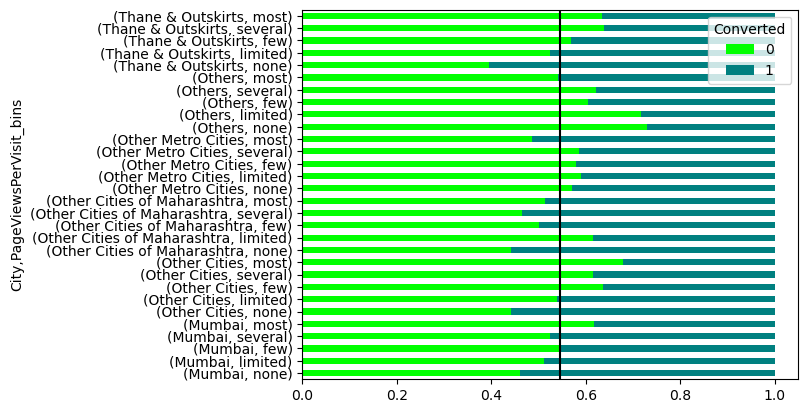

<Figure size 700x1500 with 0 Axes>

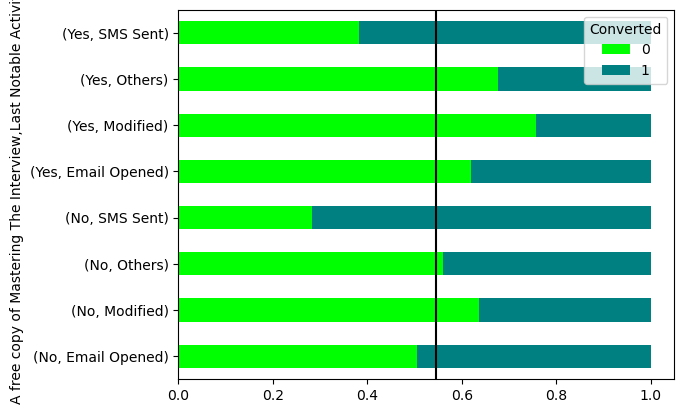

<Figure size 700x1500 with 0 Axes>

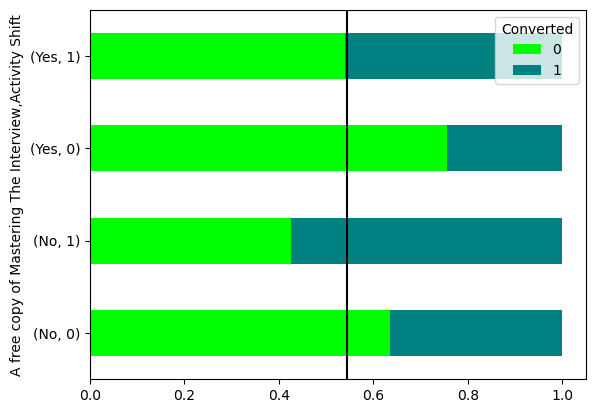

<Figure size 700x1500 with 0 Axes>

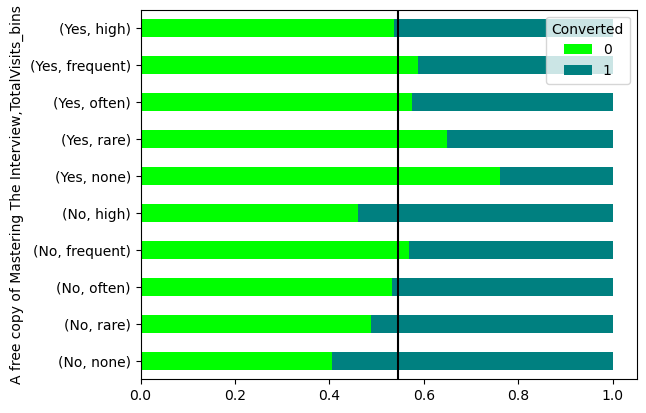

<Figure size 700x1500 with 0 Axes>

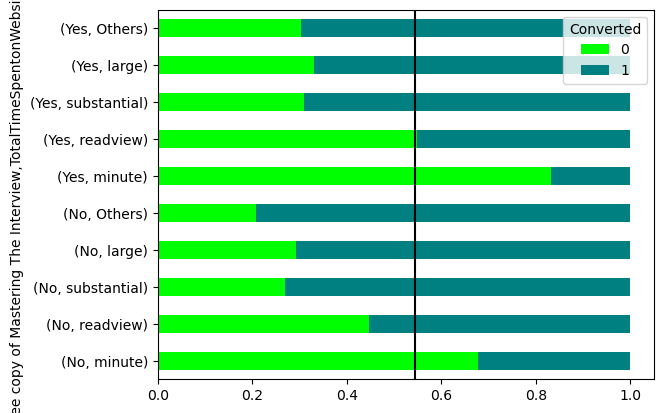

<Figure size 700x1500 with 0 Axes>

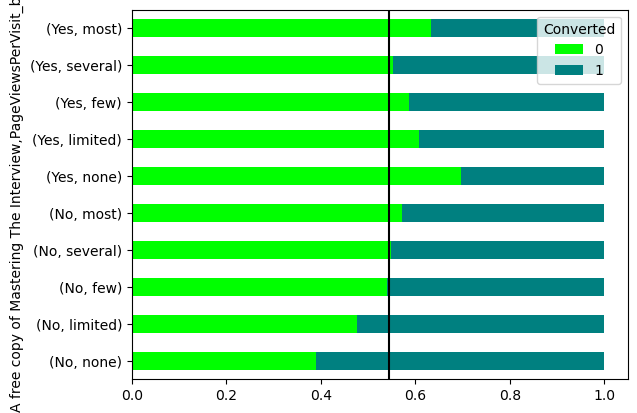

<Figure size 700x1500 with 0 Axes>

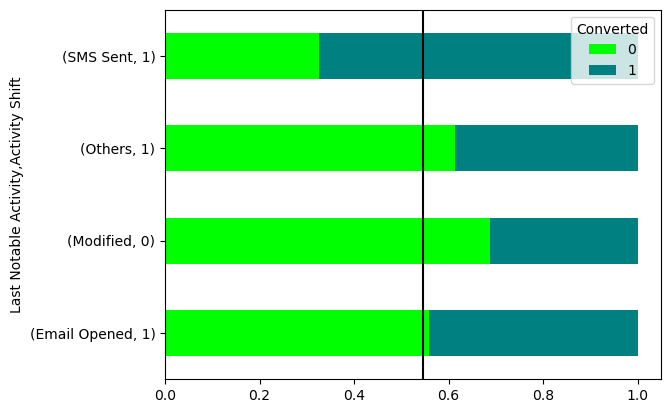

<Figure size 700x1500 with 0 Axes>

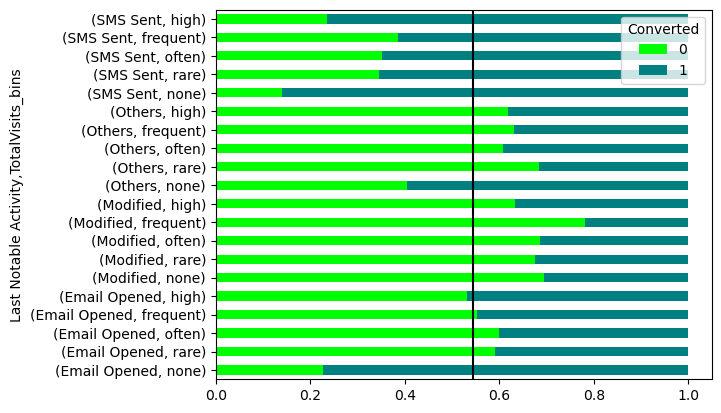

<Figure size 700x1500 with 0 Axes>

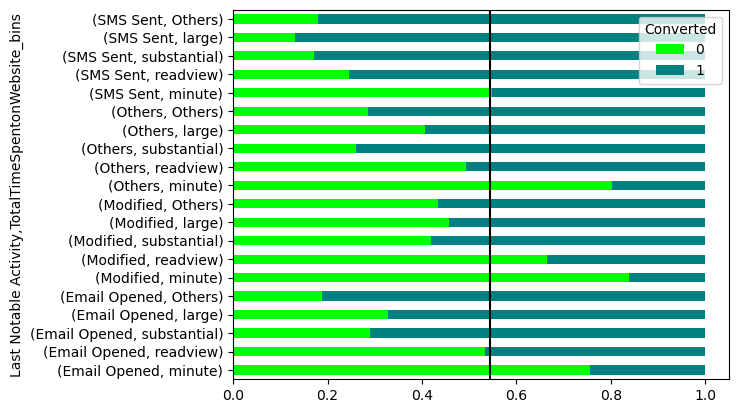

<Figure size 700x1500 with 0 Axes>

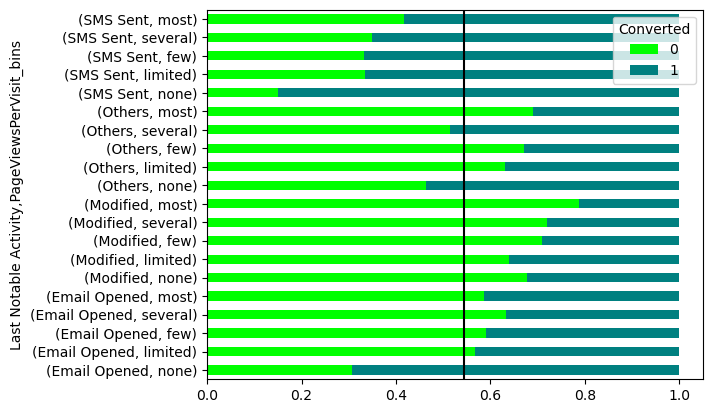

<Figure size 700x1500 with 0 Axes>

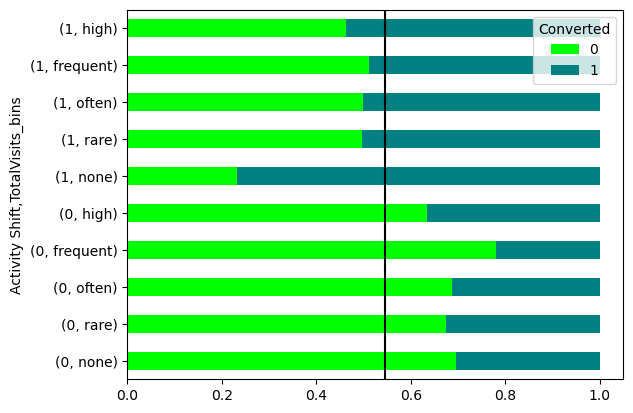

<Figure size 700x1500 with 0 Axes>

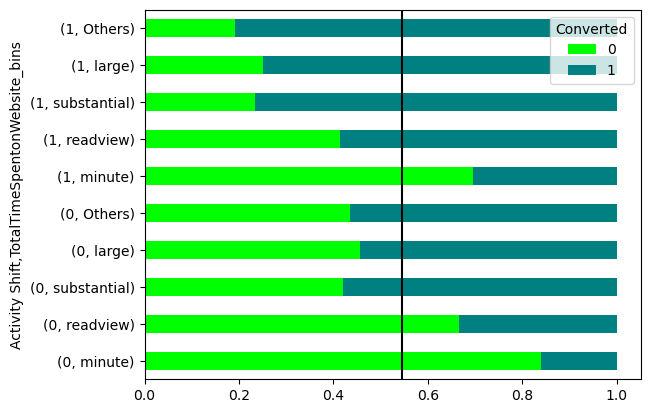

<Figure size 700x1500 with 0 Axes>

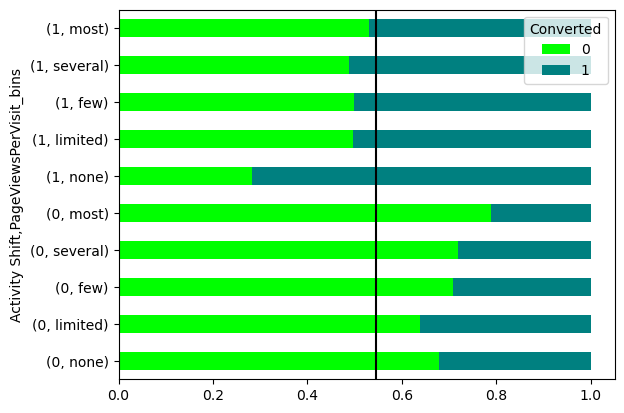

<Figure size 700x1500 with 0 Axes>

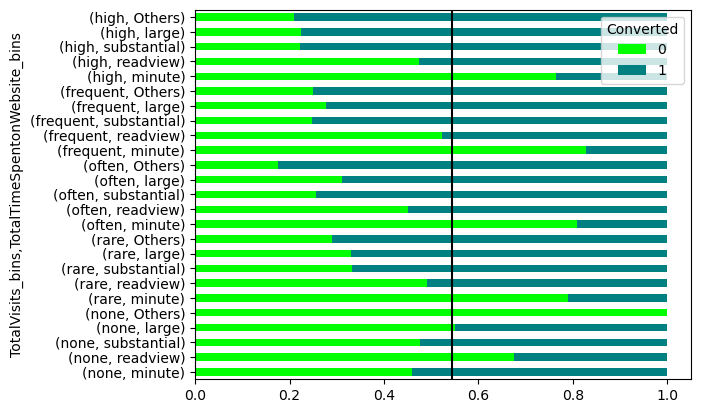

<Figure size 700x1500 with 0 Axes>

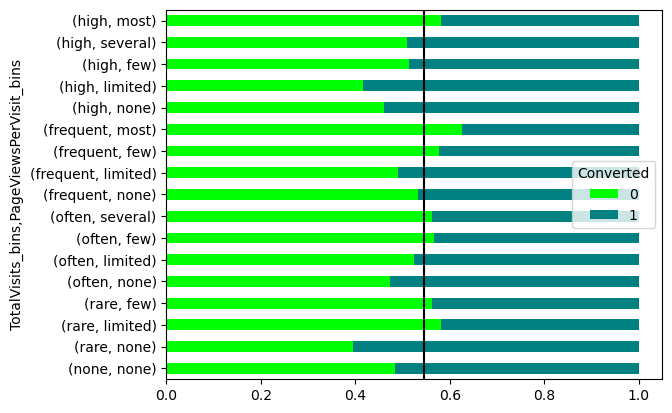

<Figure size 700x1500 with 0 Axes>

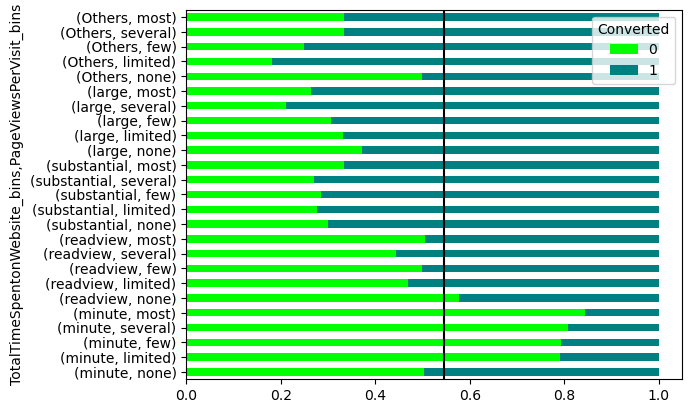

In [65]:
plotted_pairs = set()  

for i, column1 in enumerate(df3.columns):
    for j, column2 in enumerate(df3.columns):

        if (i != j) and (column1 != 'Converted') and (column2 != 'Converted') and ((column1, column2) not in plotted_pairs) and ((column2, column1) not in plotted_pairs):

            plt.figure(figsize=(7,15))
            result = pd.crosstab(index=[df3[column1], df3[column2]], columns=df3['Converted'], normalize='index')
            ax = result.plot.barh(stacked=True, color=['lime', 'teal'])
            ax.axvline(0.545, color='k')

            # Mark the pair as plotted
            plotted_pairs.add((column1, column2))

plt.show()

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

X = df3.drop(columns='Converted')
y = df3['Converted']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=218)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3846, 12), (1649, 12), (3846,), (1649,))

In [67]:
test_idx = y_test.index
test_idx

Int64Index([3683,  887, 8502, 3006, 6264, 4234, 1334, 9185, 5324, 5158,
            ...
            1303, 8631, 6192, 1682, 3845, 6345, 1505, 6687, 8478,  804],
           dtype='int64', length=1649)

In [68]:
print(y_train.value_counts())
print(y_test.value_counts())
y_train.value_counts(normalize=True)

0    2096
1    1750
Name: Converted, dtype: int64
0    898
1    751
Name: Converted, dtype: int64


0    0.545
1    0.455
Name: Converted, dtype: float64

In [69]:
X_train.head()

Lead Origin     Lead Source Do Not Email  \
8985  Landing Page Submission  Direct Traffic           No   
5387  Landing Page Submission          Google           No   
2995                      API          Others           No   
1057                      API          Others          Yes   
6070  Landing Page Submission          Google           No   

             Specialization What is your current occupation  \
8985  Operations Management                      Unemployed   
5387   Marketing Management                      Unemployed   
2995                 Others            Working Professional   
1057              Graduates                      Unemployed   
6070                 Others                          Others   

                   City A free copy of Mastering The Interview  \
8985       Other Cities                                    Yes   
5387  Thane & Outskirts                                     No   
2995             Mumbai                                    Yes   
1057             Mumbai                                     No   
6070  Thane & Outskirts                                     No   

     Last Notable Activity  Activity Shift TotalVisits_bins  \
8985          Email Opened               1             rare   
5387              SMS Sent               1            often   
2995              SMS Sent               1         frequent   
1057              Modified               0             none   
6070              Modified               0             rare   

     TotalTimeSpentonWebsite_bins PageViewsPerVisit_bins  
8985                       minute                limited  
5387                  substantial                    few  
2995                       minute                   none  
1057                       minute                   none  
6070                     readview                    few

In [70]:
binary = ['Do Not Email', 'A free copy of Mastering The Interview']
encode = ['Lead Origin', 'Lead Source', 'Specialization', 'What is your current occupation', 
          'City', 'Last Notable Activity', 'TotalVisits_bins', 'TotalTimeSpentonWebsite_bins', 'PageViewsPerVisit_bins']

In [71]:
le = LabelEncoder()
for column in binary:
    X_train[binary] = X_train[binary].apply(le.fit_transform)
    X_test[binary] = X_test[binary].apply(le.transform)

In [72]:
ohe = OneHotEncoder(drop='first', handle_unknown='infrequent_if_exist', sparse_output=False)

X_train_e = ohe.fit_transform(X_train[encode])
X_train_e = pd.DataFrame(X_train_e, columns=ohe.get_feature_names_out())
X_train = X_train.reset_index(drop=True)
X_train_e = pd.concat([X_train, X_train_e], axis=1)
X_train_e = X_train_e.drop(columns=encode)

X_test_e = ohe.fit_transform(X_test[encode])
X_test_e = pd.DataFrame(X_test_e, columns=ohe.get_feature_names_out())
X_test = X_test.reset_index(drop=True)
X_test_e = pd.concat([X_test, X_test_e], axis=1)
X_test_e = X_test_e.drop(columns=encode)

In [73]:
X_train_e.head()

Do Not Email  A free copy of Mastering The Interview  Activity Shift  \
0             0                                       1               1   
1             0                                       0               1   
2             0                                       1               1   
3             1                                       0               0   
4             0                                       0               0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                  1.0                        0.0   
1                                  1.0                        0.0   
2                                  0.0                        0.0   
3                                  0.0                        0.0   
4                                  1.0                        0.0   

   Lead Origin_Others  Lead Source_Google  Lead Source_Organic Search  \
0                 0.0                 0.0                         0.0   
1                 0.0                 1.0                         0.0   
2                 0.0                 0.0                         0.0   
3                 0.0                 0.0                         0.0   
4                 0.0                 1.0                         0.0   

   Lead Source_Others  Specialization_Finance Management  \
0                 0.0                                0.0   
1                 0.0                                0.0   
2                 1.0                                0.0   
3                 1.0                                0.0   
4                 0.0                                0.0   

   Specialization_Graduates  Specialization_Human Resource Management  \
0                       0.0                                       0.0   
1                       0.0                                       0.0   
2                       0.0                                       0.0   
3                       1.0                                       0.0   
4                       0.0                                       0.0   

   Specialization_IT Projects Management  Specialization_Marketing Management  \
0                                    0.0                                  0.0   
1                                    0.0                                  1.0   
2                                    0.0                                  0.0   
3                                    0.0                                  0.0   
4                                    0.0                                  0.0   

   Specialization_Operations Management  Specialization_Others  \
0                                   1.0                    0.0   
1                                   0.0                    0.0   
2                                   0.0                    1.0   
3                                   0.0                    0.0   
4                                   0.0                    1.0   

   Specialization_Supply Chain Management  \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   

   What is your current occupation_Unemployed  \
0                                         1.0   
1                                         1.0   
2                                         0.0   
3                                         1.0   
4                                         0.0   

   What is your current occupation_Working Professional  City_Other Cities  \
0                                                0.0                   1.0   
1                                                0.0                   0.0   
2                                                1.0                   0.0   
3                                                0.0                   0.0   
4                                                0.0      

In [74]:
y_train = y_train.reset_index()
y_test = y_test.reset_index()

In [75]:
test_reset_idx = y_test.index
test_reset_idx

RangeIndex(start=0, stop=1649, step=1)

In [76]:
y_train = y_train.drop(columns='index')
y_test = y_test.drop(columns='index')

In [77]:
# Calculate WOE and IV
def calculate_woe_iv(df, target_col, bin_col):
    event = df[df[target_col] == 1].groupby(bin_col).size() / df[df[target_col] == 1].shape[0]
    non_event = df[df[target_col] == 0].groupby(bin_col).size() / df[df[target_col] == 0].shape[0]
    
    woe = np.log(non_event / event)
    iv = (non_event - event) * woe
    
    return woe, iv

for column in df3.columns:
    if column != 'Converted':
        woe_values, iv_values = calculate_woe_iv(df3, 'Converted', column)
        df3[column] = df3[column].map(woe_values)

        # Sum up IV values
        total_iv = iv_values.sum()

        print(f"IV values {column}:", round(iv_values, 3))
        print("Total IV:", total_iv, end='\n\n')

IV values Lead Origin: Lead Origin
API                        0.044
Landing Page Submission    0.039
Lead Add Form              0.153
Others                     0.000
dtype: float64
Total IV: 0.23530429342474724

IV values Lead Source: Lead Source
Direct Traffic    0.045
Google            0.008
Organic Search    0.001
Others            0.069
dtype: float64
Total IV: 0.12224080341363114

IV values Do Not Email: Do Not Email
No     0.015
Yes    0.167
dtype: float64
Total IV: 0.1826827666658003

IV values Specialization: Specialization
Business Administration      0.000
Finance Management           0.000
Graduates                    0.001
Human Resource Management    0.000
IT Projects Management       0.003
Marketing Management         0.003
Operations Management        0.001
Others                       0.000
Supply Chain Management      0.000
dtype: float64
Total IV: 0.009598932471144598

IV values What is your current occupation: What is your current occupation
Others                  

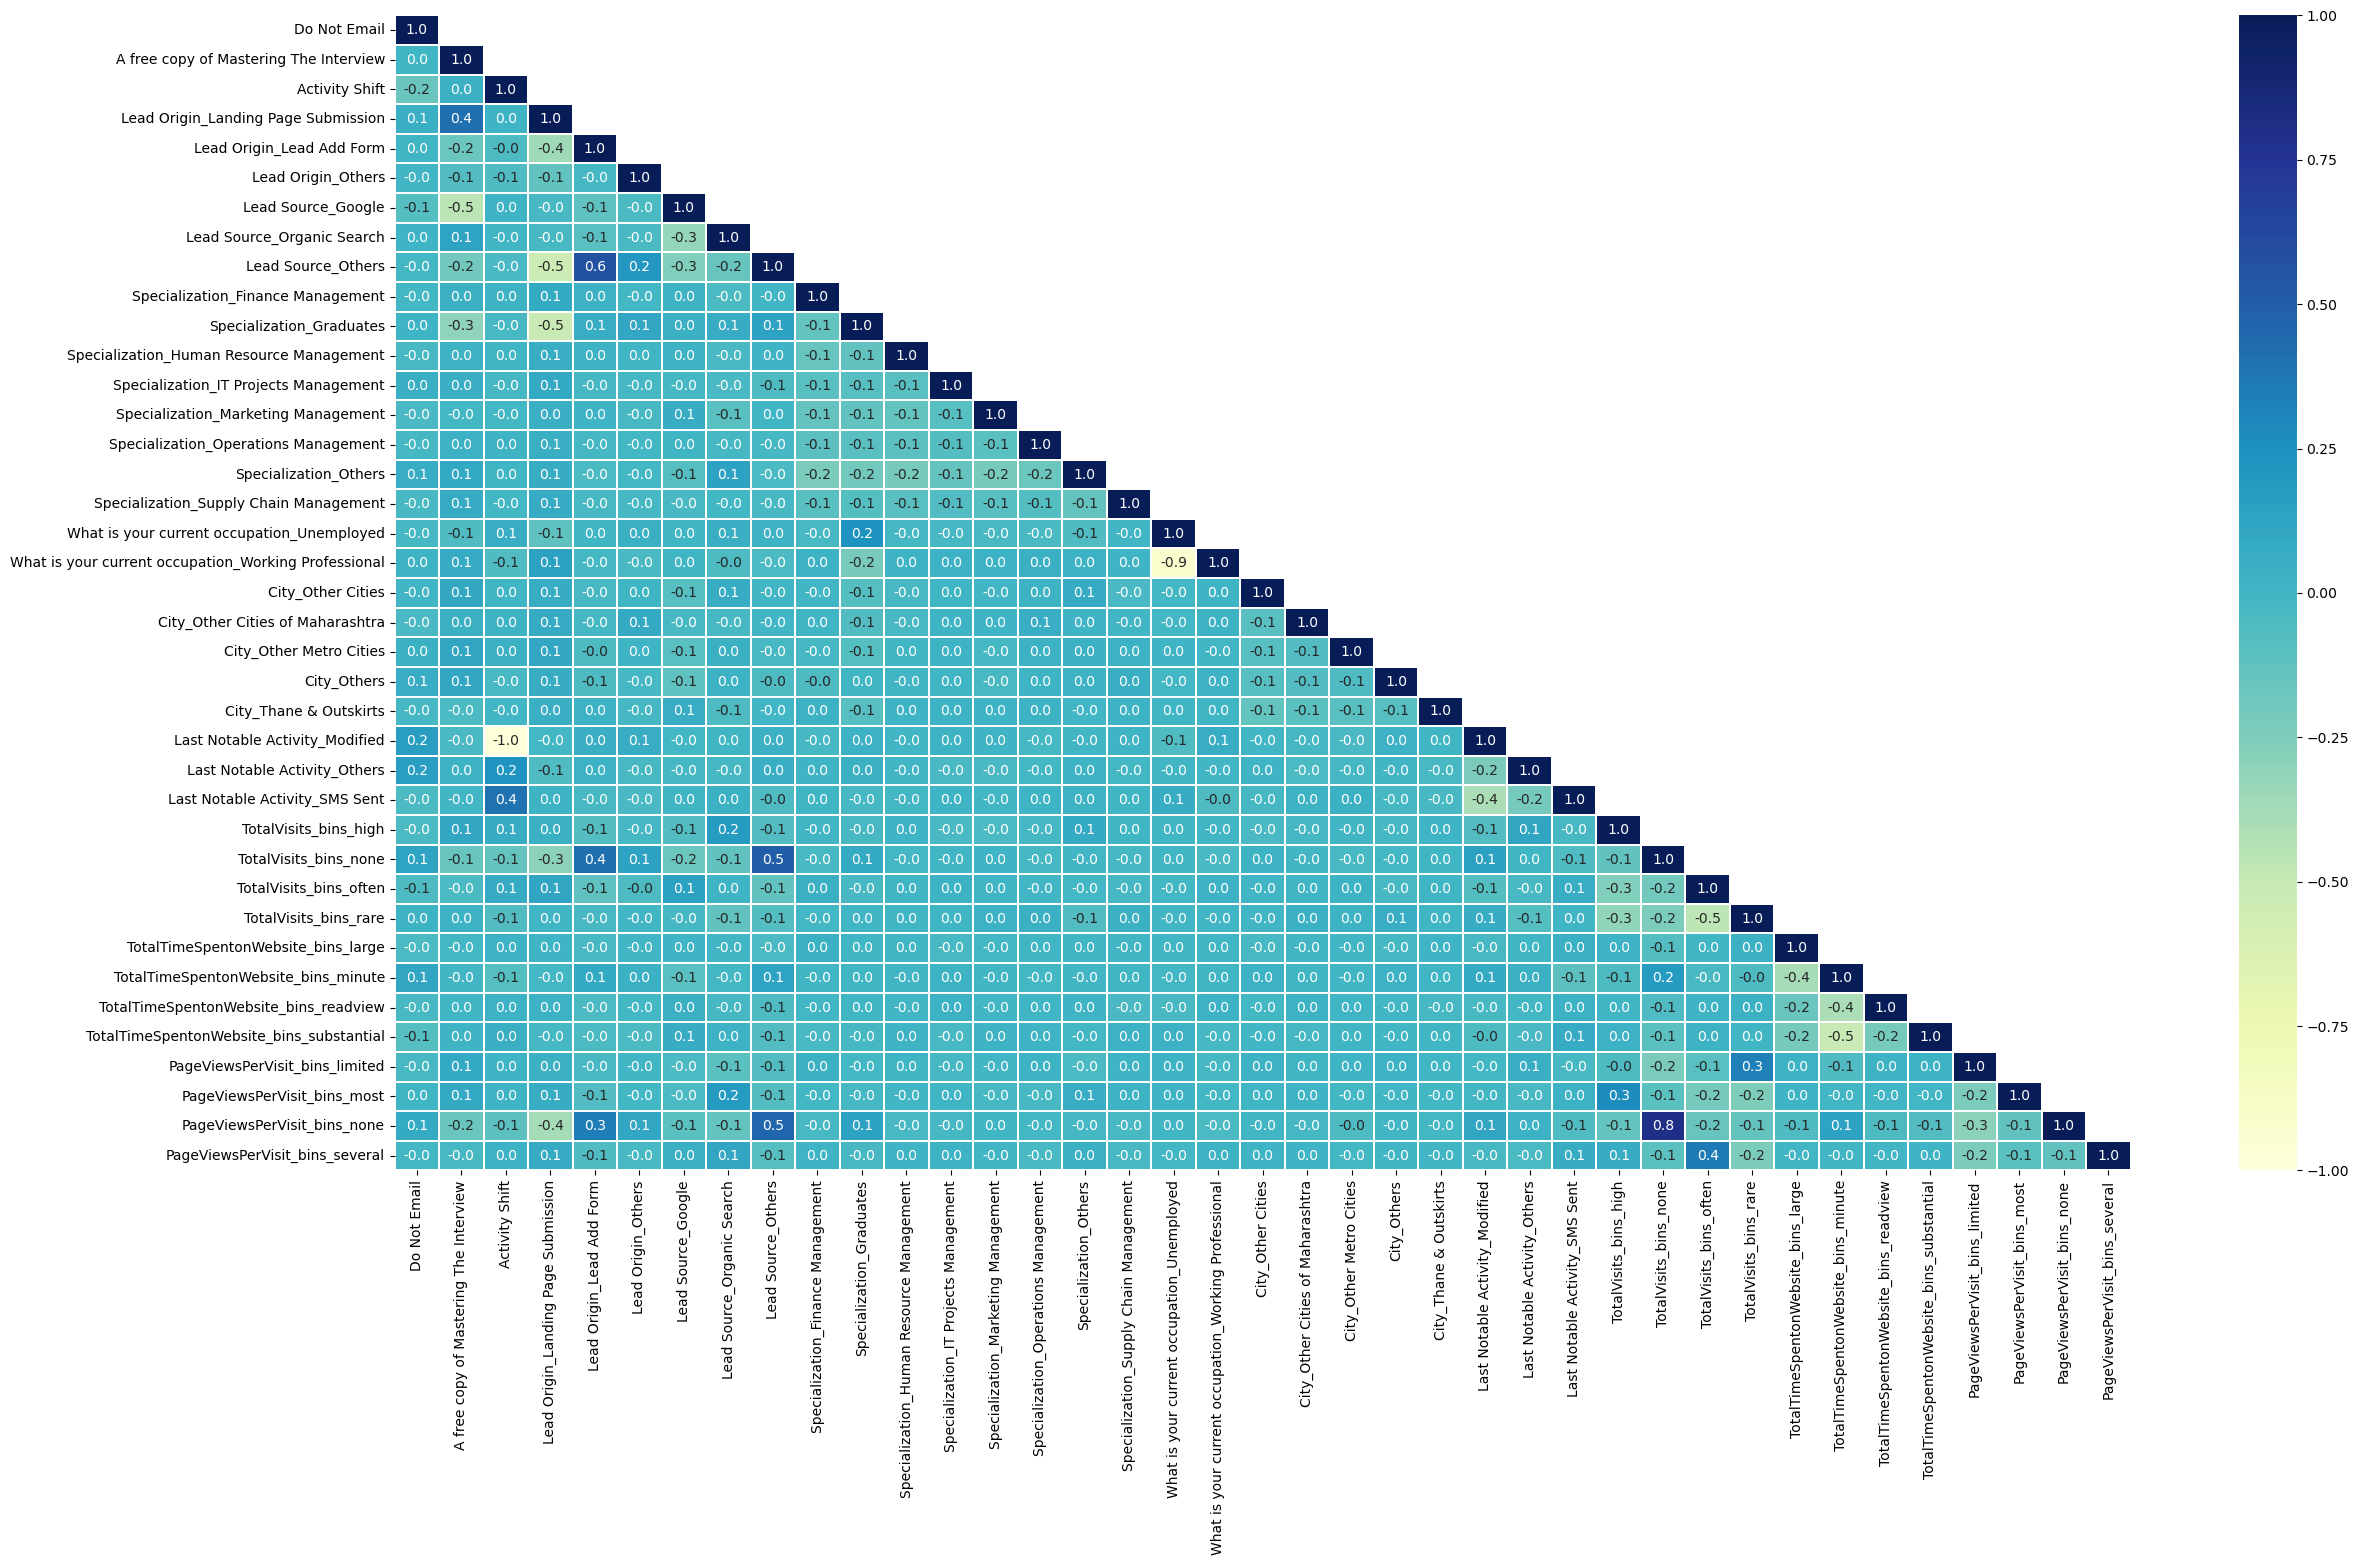

In [78]:
corr = X_train_e.corr()
mask = np.zeros_like(corr)

mask[np.triu_indices_from(mask, k=1)] = True

plt.figure(figsize=(28,15))
sns.heatmap(corr, mask=mask, linewidth=0.3, annot=True, fmt='.1f', center=0, cmap='YlGnBu')
plt.show() 

In [79]:
highCorr = ['Last Notable Activity_Modified', 'What is your current occupation_Working Professional', 'PageViewsPerVisit_bins_none']
X_train_e = X_train_e.drop(columns=highCorr)
X_test_e = X_test_e.drop(columns=highCorr)

In [80]:
X_train_e.duplicated().sum()

185

In [81]:
xtDrop = X_train_e[X_train_e.duplicated()].index

In [82]:
X_train_e = X_train_e.drop(index=xtDrop)

In [83]:
y_train = y_train.drop(index=xtDrop)

In [84]:
X_test_e.duplicated().sum()

31

In [85]:
xtestDrop = X_test_e[X_test_e.duplicated()].index

In [86]:
X_test_e = X_test_e.drop(index=xtestDrop)
y_test = y_test.drop(index=xtestDrop)

In [87]:
fetchID = pd.DataFrame(test_idx)
fetchID = fetchID.drop(index=xtestDrop)
fetchID.shape

(1618, 1)

In [88]:
X_train_e.shape

(3661, 36)

In [89]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

def feature_selection(X, y, threshold_p=0.05, threshold_vif=3):
    
    # Adding a constant for the intercept
    X_sm = sm.add_constant(X)
    
    model = sm.GLM(y, X_sm, family=sm.families.Binomial()).fit()
    ols_vif = pd.DataFrame({'coef': round(model.params, 2), 'p': round(model.pvalues, 3)})
    ols_vif.drop(index=['const'], inplace=True)
    
    #print(model.summary())
    
    # Calculate VIF for each feature
    ols_vif['vif'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    ols_vif['vif'] = ols_vif['vif'].round(3)
    
    # Sorting by p-values and VIF
    ols_vif = ols_vif.sort_values(by=['p', 'vif'], ascending=False)
    
    #print(ols_vif)
    
    # Check conditions to drop a feature
    if ols_vif.iloc[0, 1] > threshold_p:
        feature_to_drop = ols_vif.index[0]
        
        print(f"Dropping feature '{feature_to_drop}' due to high p-value ({ols_vif.iloc[0, 1]}).", end='\n')
        
        X = X.drop(columns=[feature_to_drop])
        return feature_selection(X, y, threshold_p, threshold_vif)  
    
    elif (ols_vif.loc[:, 'vif'] > threshold_vif).any():
        feature_to_drop = ols_vif[ols_vif['vif'] == max(ols_vif['vif'])].index[0]
        
        print(f"Dropping feature '{feature_to_drop}' due to high VIF ({max(ols_vif['vif'])}).", end='\n')
       
        X = X.drop(columns=[feature_to_drop])
        return feature_selection(X, y, threshold_p, threshold_vif)  
    
    else:
        print("Recursive feature elimination completed!")
        
        return X

X_train_final = feature_selection(X_train_e, y_train)

Dropping feature 'City_Other Cities' due to high p-value (0.967).
Dropping feature 'Specialization_Others' due to high p-value (0.949).
Dropping feature 'What is your current occupation_Unemployed' due to high p-value (0.941).
Dropping feature 'Last Notable Activity_Others' due to high p-value (0.875).
Dropping feature 'Specialization_Human Resource Management' due to high p-value (0.814).
Dropping feature 'Specialization_Finance Management' due to high p-value (0.827).
Dropping feature 'PageViewsPerVisit_bins_limited' due to high p-value (0.783).
Dropping feature 'City_Other Metro Cities' due to high p-value (0.676).
Dropping feature 'TotalVisits_bins_often' due to high p-value (0.49).
Dropping feature 'Specialization_IT Projects Management' due to high p-value (0.397).
Dropping feature 'Lead Origin_Others' due to high p-value (0.379).
Dropping feature 'Specialization_Supply Chain Management' due to high p-value (0.351).
Dropping feature 'City_Others' due to high p-value (0.367).
Drop

In [90]:
X_train_final.columns

Index(['Do Not Email', 'A free copy of Mastering The Interview',
       'Activity Shift', 'Lead Origin_Lead Add Form',
       'Specialization_Graduates', 'Last Notable Activity_SMS Sent',
       'TotalVisits_bins_rare', 'TotalTimeSpentonWebsite_bins_minute',
       'TotalTimeSpentonWebsite_bins_readview', 'PageViewsPerVisit_bins_most',
       'PageViewsPerVisit_bins_several'],
      dtype='object')

In [91]:
X_test_final = X_test_e[X_train_final.columns]
X_test_final.shape

(1618, 11)

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

param_distributions = {
    'solver' : ['lbfgs', 'liblinear'],
    'tol' : [1e-5, 1e-4, 1e-3, 1e-2, 1, 10, 100],
    'C' : [0.01, 1, 10, 100, 1000],
    'penalty' : [None, 'l2', 'l1']
}

logreg = LogisticRegression(class_weight='balanced', random_state=605)

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=626)
rs = RandomizedSearchCV(logreg, param_distributions, scoring='accuracy', cv=cv, n_jobs=-1)

rs.fit(X_train_final, y_train)
rs.best_params_

{'tol': 1, 'solver': 'lbfgs', 'penalty': None, 'C': 10}

In [93]:
res = pd.DataFrame(rs.cv_results_).sort_values(by='rank_test_score')
res.head(2)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_tol  \
4          0.018         0.007            0.006           0.003         1   
7          0.009         0.008            0.008           0.008       0.0   

  param_solver param_penalty param_C  \
4        lbfgs          None      10   
7    liblinear            l1      10   

                                              params  split0_test_score  \
4  {'tol': 1, 'solver': 'lbfgs', 'penalty': None,...              0.730   
7  {'tol': 0.0001, 'solver': 'liblinear', 'penalt...              0.733   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
4              0.732              0.743               0.74              0.801   
7              0.732              0.743               0.74              0.801   

   split5_test_score  split6_test_score  split7_test_score  split8_test_score  \
4              0.792              0.781              0.760              0.732   
7              0.792              0.781              0.751              0.732   

   split9_test_score  mean_test_score  std_test_score  rank_test_score  
4               0.76            0.757           0.025                1  
7               0.76            0.757           0.025                2

In [94]:
lr = rs.best_estimator_

In [95]:
lr.score(X_train_final, y_train)

0.7568970226714012

In [96]:
lr.score(X_test_final, y_test)

0.7583436341161929

In [97]:
lr.coef_

array([[-1.51987107, -0.52982125,  0.51296953,  2.97835327, -0.30415883,
         1.15402903, -0.40068319, -2.25604088, -0.85293626, -0.45870776,
        -0.36394246]])

In [98]:
train_pred = lr.predict(X_train_final)
test_pred = lr.predict(X_test_final)

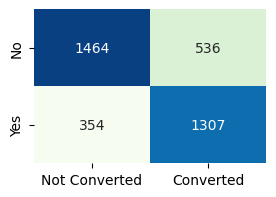

In [99]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, train_pred)

cmRes = pd.DataFrame(cm, columns=['Not Converted', 'Converted'], index=['No', 'Yes'])
plt.figure(figsize=(3,2))
sns.heatmap(cmRes, annot=True, fmt='g', cmap='GnBu', cbar=False);

In [100]:
X_train_final.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

In [101]:
train_proba = lr.predict_proba(X_train_final)[:, 1]

In [102]:
proba = pd.concat([y_train, pd.Series(train_proba)], axis=1)
proba.columns = ['Actual', 'PredProba']

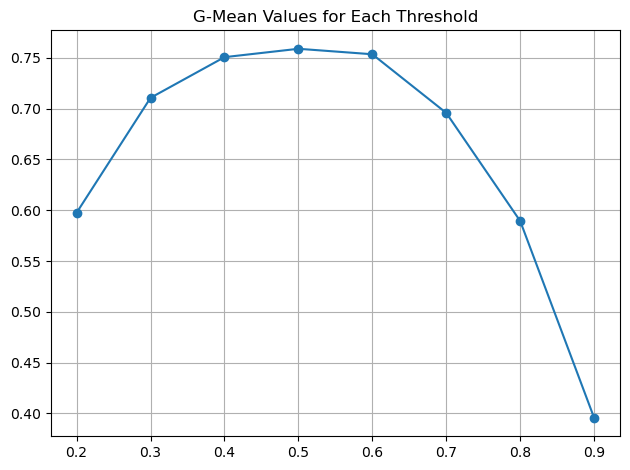

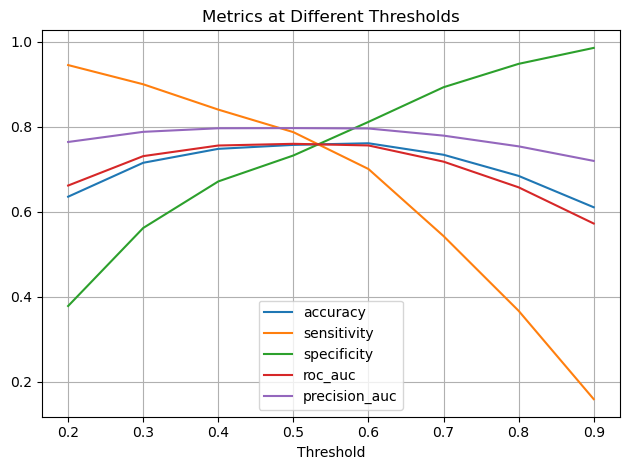

     accuracy  sensitivity  specificity  roc_auc  gmeans  precision_auc
0.2     0.635        0.945        0.378    0.661   0.598          0.764
0.3     0.715        0.899        0.561    0.730   0.711          0.788
0.4     0.748        0.840        0.671    0.755   0.751          0.796
0.5     0.757        0.787        0.732    0.759   0.759          0.796
0.6     0.761        0.700        0.811    0.756   0.754          0.795
0.7     0.734        0.542        0.892    0.717   0.696          0.779
0.8     0.684        0.367        0.948    0.657   0.589          0.753
0.9     0.610        0.159        0.985    0.572   0.396          0.719


In [103]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve

thresh = [i/10 for i in range(2, 10)]
metric = pd.DataFrame(index=['accuracy', 'sensitivity', 'specificity', 'roc_auc', 'gmeans', 'precision_auc'])

for i in thresh:
    proba[f'Prediction_{i}'] = proba['PredProba'].apply(lambda p: 0 if p < i else 1)

    cm = confusion_matrix(proba['Actual'], proba[f'Prediction_{i}'])

    tn, fp, fn, tp = cm.ravel()

    accuracy = (tp + tn) / (tp + tn + fp + fn)
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    metric.loc['accuracy', i] = accuracy
    metric.loc['sensitivity', i] = sensitivity  # relevant scoring for business
    metric.loc['specificity', i] = specificity

    fpr, tpr, _ = roc_curve(proba['Actual'], proba[f'Prediction_{i}'])
    metric.loc['roc_auc', i] = auc(fpr, tpr)

    gmeans = np.sqrt(tpr * (1-fpr))
    ix = np.argmax(gmeans)
    metric.loc['gmeans', i] = gmeans[ix]

    precision, recall, thresholds = precision_recall_curve(proba['Actual'], proba[f'Prediction_{i}'])
    precision_auc = auc(recall, precision)  
    metric.loc['precision_auc', i] = precision_auc

plt.plot(metric.columns, metric.loc['gmeans', :], marker='o', linestyle='-')
plt.title('G-Mean Values for Each Threshold')
plt.grid(True)
plt.tight_layout()
plt.show()

metric = metric.T
metric[['accuracy', 'sensitivity', 'specificity', 'roc_auc', 'precision_auc']].plot(linestyle='-', xlabel='Threshold')
plt.title('Metrics at Different Thresholds')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

print(metric)


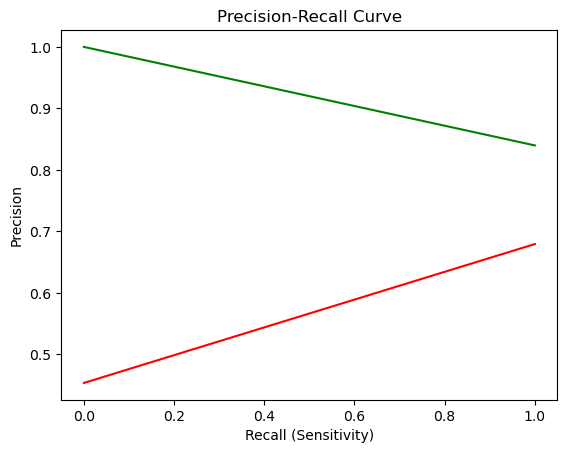

In [104]:
from sklearn.metrics import precision_recall_curve


precision, recall, thresholds = precision_recall_curve(proba['Actual'], proba['Prediction_0.4'])

plt.plot(thresholds, precision[:-1], 'r-')
plt.plot(thresholds, recall[:-1], 'g-')
plt.xlabel('Recall (Sensitivity)')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [105]:
test_proba = lr.predict_proba(X_test_final)
test_proba = test_proba[:,1]

In [106]:
threshold = 0.4
test_pred_final = [0 if prob < threshold else 1 for prob in test_proba]

In [107]:
test_pred_final = pd.Series(test_pred_final)

In [108]:
from sklearn.metrics import classification_report

print(classification_report(y_test, test_pred_final))

              precision    recall  f1-score   support

           0       0.83      0.68      0.75       884
           1       0.68      0.83      0.75       734

    accuracy                           0.75      1618
   macro avg       0.76      0.75      0.75      1618
weighted avg       0.76      0.75      0.75      1618



In [109]:
fetchID_array = fetchID.values.flatten()
fetchID_array

array([3683,  887, 8502, ..., 6687, 8478,  804], dtype=int64)

In [110]:
uniqID = df0.loc[fetchID_array, 'Lead Number']
uniqID.shape

(1618,)

In [111]:
test_proba = pd.Series(test_proba)
uniqID = pd.Series(uniqID.values.flatten())
test_pred_final = test_pred_final.values.flatten()
y_test = y_test.values.flatten()

In [112]:
y_test_predictions = pd.DataFrame({'CustID': uniqID, 'Actuals': y_test, 
                                   'Conversion Probability': test_proba, 'Predicted': test_pred_final})
y_test_predictions['Score'] = y_test_predictions['Conversion Probability'].mul(100).astype(int)
y_test_predictions

CustID  Actuals  Conversion Probability  Predicted  Score
0     624831        0                   0.536          1     53
1     651020        1                   0.325          0     32
2     584802        0                   0.317          0     31
3     630972        1                   0.657          1     65
4     601780        0                   0.619          1     61
...      ...      ...                     ...        ...    ...
1613  601223        0                   0.852          1     85
1614  644286        0                   0.234          0     23
1615  598518        1                   0.852          1     85
1616  585120        0                   0.492          1     49
1617  652014        1                   0.577          1     57

[1618 rows x 5 columns]

In [113]:
# Gain Chart
y_test_predictions = y_test_predictions.sort_values('Conversion Probability', ascending=False)
y_test_predictions['Decile'] = pd.qcut(y_test_predictions['Conversion Probability'],10,labels=range(10,0,-1))
y_test_predictions['Converted'] = y_test_predictions['Actuals'].astype('int')
y_test_predictions['Not Converted'] = 1 - y_test_predictions['Converted']
y_test_predictions.head()

CustID  Actuals  Conversion Probability  Predicted  Score Decile  \
511   601868        1                   0.997          1     99      1   
896   634647        1                   0.995          1     99      1   
742   609334        1                   0.992          1     99      1   
668   609185        1                   0.989          1     98      1   
1291  587853        1                   0.989          1     98      1   

      Converted  Not Converted  
511           1              0  
896           1              0  
742           1              0  
668           1              0  
1291          1              0

In [114]:
gc = pd.pivot_table(data=y_test_predictions,index=['Decile'],values=['Converted','Not Converted','Conversion Probability'],
                     aggfunc={'Converted':[np.sum], 'Not Converted':[np.sum], 'Conversion Probability' : [np.min,np.max]})
gc # maximum vertical distance between CDFs

Conversion Probability        Converted Not Converted
                         amax   amin       sum           sum
Decile                                                      
10                      0.125  0.023        10           155
9                       0.165  0.129        22           141
8                       0.224  0.167        26           134
7                       0.325  0.230        45           141
6                       0.502  0.336        55            80
5                       0.605  0.502        95            71
4                       0.698  0.619        97            61
3                       0.807  0.710       122            43
2                       0.896  0.807       128            44
1                       0.997  0.901       134            14

In [115]:
gc = gc.reset_index()
gc.columns = ['Decile','Max Prob', 'Min Prob','Converted Count','Not Converted Count']
gc

Decile  Max Prob  Min Prob  Converted Count  Not Converted Count
0     10     0.125     0.023               10                  155
1      9     0.165     0.129               22                  141
2      8     0.224     0.167               26                  134
3      7     0.325     0.230               45                  141
4      6     0.502     0.336               55                   80
5      5     0.605     0.502               95                   71
6      4     0.698     0.619               97                   61
7      3     0.807     0.710              122                   43
8      2     0.896     0.807              128                   44
9      1     0.997     0.901              134                   14

In [116]:
gc = gc.sort_values(by='Decile', ascending=False)
gc['Total Leads'] = gc['Converted Count'] + gc['Not Converted Count']
gc['Conversion Rate'] = gc['Converted Count'] / gc['Not Converted Count']

converted_total = gc['Converted Count'].sum()
notconverted_total = gc['Not Converted Count'].sum()

gc['Converted Ratio'] = gc['Converted Count'] / converted_total
gc['Cumulative CR'] = gc['Converted Ratio'].cumsum()

gc['Not Converted Ratio'] = gc['Not Converted Count'] / notconverted_total
gc['Cumulative NCR'] = gc['Not Converted Ratio'].cumsum()

gc['KS stats'] = np.round((gc['Cumulative CR'] - gc['Cumulative NCR']), 4) * 100
gc # Decile 5 suggests better discrimination between positive and negative instances

Decile  Max Prob  Min Prob  Converted Count  Not Converted Count  \
9      1     0.997     0.901              134                   14   
8      2     0.896     0.807              128                   44   
7      3     0.807     0.710              122                   43   
6      4     0.698     0.619               97                   61   
5      5     0.605     0.502               95                   71   
4      6     0.502     0.336               55                   80   
3      7     0.325     0.230               45                  141   
2      8     0.224     0.167               26                  134   
1      9     0.165     0.129               22                  141   
0     10     0.125     0.023               10                  155   

   Total Leads  Conversion Rate  Converted Ratio  Cumulative CR  \
9          148            9.571            0.183          0.183   
8          172            2.909            0.174          0.357   
7          165            2.837            0.166          0.523   
6          158            1.590            0.132          0.655   
5          166            1.338            0.129          0.785   
4          135            0.688            0.075          0.860   
3          186            0.319            0.061          0.921   
2          160            0.194            0.035          0.956   
1          163            0.156            0.030          0.986   
0          165            0.065            0.014          1.000   

   Not Converted Ratio  Cumulative NCR  KS stats  
9                0.016           0.016     16.67  
8                0.050           0.066     29.13  
7                0.049           0.114     40.89  
6                0.069           0.183     47.21  
5                0.080           0.264     52.12  
4                0.090           0.354     50.56  
3                0.160           0.514     40.74  
2                0.152           0.665     29.12  
1                0.160           0.825     16.17  
0                0.175           1.000     -0.00

In [117]:
gc['Cum Conversion Perc'] = gc['Cumulative CR'] * 100
gc['Level'] = np.arange(10,110,10)
gc

Decile  Max Prob  Min Prob  Converted Count  Not Converted Count  \
9      1     0.997     0.901              134                   14   
8      2     0.896     0.807              128                   44   
7      3     0.807     0.710              122                   43   
6      4     0.698     0.619               97                   61   
5      5     0.605     0.502               95                   71   
4      6     0.502     0.336               55                   80   
3      7     0.325     0.230               45                  141   
2      8     0.224     0.167               26                  134   
1      9     0.165     0.129               22                  141   
0     10     0.125     0.023               10                  155   

   Total Leads  Conversion Rate  Converted Ratio  Cumulative CR  \
9          148            9.571            0.183          0.183   
8          172            2.909            0.174          0.357   
7          165            2.837            0.166          0.523   
6          158            1.590            0.132          0.655   
5          166            1.338            0.129          0.785   
4          135            0.688            0.075          0.860   
3          186            0.319            0.061          0.921   
2          160            0.194            0.035          0.956   
1          163            0.156            0.030          0.986   
0          165            0.065            0.014          1.000   

   Not Converted Ratio  Cumulative NCR  KS stats  Cum Conversion Perc  Level  
9                0.016           0.016     16.67               18.256     10  
8                0.050           0.066     29.13               35.695     20  
7                0.049           0.114     40.89               52.316     30  
6                0.069           0.183     47.21               65.531     40  
5                0.080           0.264     52.12               78.474     50  
4                0.090           0.354     50.56               85.967     60  
3                0.160           0.514     40.74               92.098     70  
2                0.152           0.665     29.12               95.640     80  
1                0.160           0.825     16.17               98.638     90  
0                0.175           1.000     -0.00              100.000    100

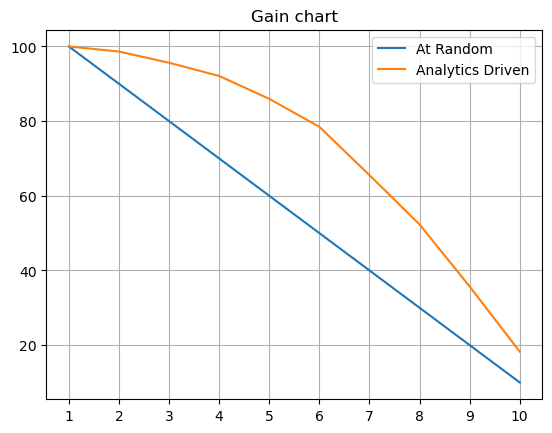

In [118]:
gc[['Level', 'Cum Conversion Perc']].plot()
plt.grid(True)
plt.title('Gain chart')
plt.xticks(list(range(0,10)), labels=list(range(1, 11)))
plt.legend(('At Random', 'Analytics Driven'))
plt.show() # Better performance in approaching leads with suggested model than attempting at random

In [119]:
gc['Lift'] = gc['Cum Conversion Perc'] / gc['Level']
gc['Baseline'] = 1
gc

Decile  Max Prob  Min Prob  Converted Count  Not Converted Count  \
9      1     0.997     0.901              134                   14   
8      2     0.896     0.807              128                   44   
7      3     0.807     0.710              122                   43   
6      4     0.698     0.619               97                   61   
5      5     0.605     0.502               95                   71   
4      6     0.502     0.336               55                   80   
3      7     0.325     0.230               45                  141   
2      8     0.224     0.167               26                  134   
1      9     0.165     0.129               22                  141   
0     10     0.125     0.023               10                  155   

   Total Leads  Conversion Rate  Converted Ratio  Cumulative CR  \
9          148            9.571            0.183          0.183   
8          172            2.909            0.174          0.357   
7          165            2.837            0.166          0.523   
6          158            1.590            0.132          0.655   
5          166            1.338            0.129          0.785   
4          135            0.688            0.075          0.860   
3          186            0.319            0.061          0.921   
2          160            0.194            0.035          0.956   
1          163            0.156            0.030          0.986   
0          165            0.065            0.014          1.000   

   Not Converted Ratio  Cumulative NCR  KS stats  Cum Conversion Perc  Level  \
9                0.016           0.016     16.67               18.256     10   
8                0.050           0.066     29.13               35.695     20   
7                0.049           0.114     40.89               52.316     30   
6                0.069           0.183     47.21               65.531     40   
5                0.080           0.264     52.12               78.474     50   
4                0.090           0.354     50.56               85.967     60   
3                0.160           0.514     40.74               92.098     70   
2                0.152           0.665     29.12               95.640     80   
1                0.160           0.825     16.17               98.638     90   
0                0.175           1.000     -0.00              100.000    100   

    Lift  Baseline  
9  1.826         1  
8  1.785         1  
7  1.744         1  
6  1.638         1  
5  1.569         1  
4  1.433         1  
3  1.316         1  
2  1.196         1  
1  1.096         1  
0  1.000         1

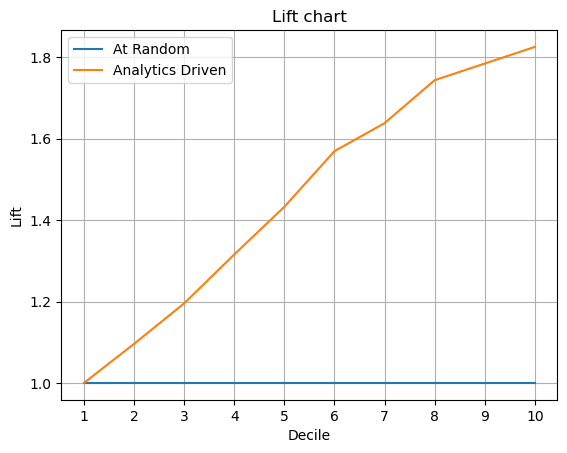

In [120]:
plot_lift =['Baseline', 'Lift']
plt.plot(gc[plot_lift])
plt.xticks(list(range(0,10)), labels=list(range(1, 11)))
plt.title('Lift chart')
plt.xlabel('Decile')
plt.ylabel('Lift')
plt.legend(('At Random', 'Analytics Driven'))
plt.grid(True)
plt.show()

In [121]:
cd = y_test_predictions[['Actuals', 'Conversion Probability']]

label1 = cd[cd['Actuals'] == 1]['Conversion Probability']
label0 = cd[cd['Actuals'] == 0]['Conversion Probability']

In [122]:
from collections import Counter

pairs = set()
concordance = []


for i, p in enumerate(label1):
    for i2, p2 in enumerate(label0):
        if ((i, i2) not in pairs) and ((i2, i) not in pairs):
            concordance.append(1 if p > p2 else 0)
            pairs.add((i, i2))

concordance_counter = Counter(concordance)

print(f'No of values rightly greater (1s): {concordance_counter[1]}')
print(f'No of values not greater (0s): {concordance_counter[0]}')
print(f'Total pairs: {len(pairs)}')
print(f'Concordance ratio {round(concordance_counter[1] / len(pairs) * 100, 2)}')

No of values rightly greater (1s): 379163
No of values not greater (0s): 682
Total pairs: 379845
Concordance ratio 99.82
